## Improving Epidemiological Diseases Mitigation: A case study of Monkeypox using Agent-based Modelling and Machine Learning Approaches.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# import dataset
mk = pd.read_csv("Monkeypox.csv")

# Display the first few rows of the dataset
mk.head()

ID     Status                             Location    City  Country  Age  \
0  1.0  confirmed  Guy's and St Thomas Hospital London  London  England  NaN   
1  2.0  confirmed  Guy's and St Thomas Hospital London  London  England  NaN   
2  3.0  confirmed                               London  London  England  NaN   
3  4.0  confirmed                               London  London  England  NaN   
4  5.0  confirmed                               London  London  England  NaN   

  Gender  Date_onset Date_confirmation        Symptoms  ...  \
0    NaN  29/04/2022        06/05/2022            rash  ...   
1    NaN  05/05/2022        12/05/2022            rash  ...   
2    NaN  30/04/2022        13/05/2022  vesicular rash  ...   
3   male         NaN        15/05/2022  vesicular rash  ...   
4   male         NaN        15/05/2022  vesicular rash  ...   

  Travel_history_location Travel_history_country   Genomics_Metadata  \
0  Lagos and Delta States                Nigeria  West African Clade   
1                     NaN                    NaN  West African Clade   
2                     NaN                    NaN  West African Clade   
3                     NaN                    NaN  West African Clade   
4                     NaN                    NaN  West African Clade   

  Confirmation_method                                             Source  \
0              RT-PCR  https://www.gov.uk/government/news/monkeypox-c...   
1              RT-PCR  https://www.gov.uk/government/news/monkeypox-c...   
2              RT-PCR  https://www.gov.uk/government/news/monkeypox-c...   
3                 NaN  https://www.gov.uk/government/news/monkeypox-c...   
4                 NaN  https://www.gov.uk/government/news/monkeypox-c...   

                                           Source_II  Date_entry  \
0  https://www.who.int/emergencies/disease-outbre...  18/05/2022   
1                                                NaN  18/05/2022   
2                                                NaN  18/05/2022   
3                                                NaN  18/05/2022   
4                                                NaN  18/05/2022   

  Date_last_modified Source_III Country_ISO3  
0         18/05/2022        NaN          GBR  
1         18/05/2022        NaN          GBR  
2         18/05/2022        NaN          GBR  
3         18/05/2022        NaN          GBR  
4         18/05/2022        NaN          GBR  

[5 rows x 31 columns]

In [6]:
# Check the number of rows and columns of the dataset
mk.shape

(1133, 31)

In [7]:
# Check basic information about the dataset
mk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1132 non-null   float64
 1   Status                   1132 non-null   object 
 2   Location                 476 non-null    object 
 3   City                     371 non-null    object 
 4   Country                  1132 non-null   object 
 5   Age                      168 non-null    object 
 6   Gender                   319 non-null    object 
 7   Date_onset               8 non-null      object 
 8   Date_confirmation        920 non-null    object 
 9   Symptoms                 111 non-null    object 
 10  Hospitalised (Y/N/NA)    132 non-null    object 
 11  Date_hospitalisation     13 non-null     object 
 12  Isolated (Y/N/NA)        141 non-null    object 
 13  Date_isolation           11 non-null     object 
 14  Outcome                 

In [8]:
mk.columns

Index(['ID', 'Status', 'Location', 'City', 'Country', 'Age', 'Gender',
       'Date_onset', 'Date_confirmation', 'Symptoms', 'Hospitalised (Y/N/NA)',
       'Date_hospitalisation', 'Isolated (Y/N/NA)', 'Date_isolation',
       'Outcome', 'Contact_comment', 'Contact_ID', 'Contact_location',
       'Travel_history (Y/N/NA)', 'Travel_history_entry',
       'Travel_history_start', 'Travel_history_location',
       'Travel_history_country', 'Genomics_Metadata', 'Confirmation_method',
       'Source', 'Source_II', 'Date_entry', 'Date_last_modified', 'Source_III',
       'Country_ISO3'],
      dtype='object')

In [66]:
# Check the categories of the dependent variable
mk['Status'].value_counts()

confirmed    920
discarded    145
suspected     67
Name: Status, dtype: int64

In [67]:
# Descriptive statistics
mk.describe()

ID   Contact_ID
count  1132.000000     7.000000
mean    566.500000   521.285714
std     326.924558   592.798368
min       1.000000     2.000000
25%     283.750000    51.000000
50%     566.500000   100.000000
75%     849.250000  1110.000000
max    1132.000000  1225.000000

In [68]:
# Check for missing values
mk.isna().sum()

ID                            1
Status                        1
Location                    657
City                        762
Country                       1
Age                         965
Gender                      814
Date_onset                 1125
Date_confirmation           213
Symptoms                   1022
Hospitalised (Y/N/NA)      1001
Date_hospitalisation       1120
Isolated (Y/N/NA)           992
Date_isolation             1122
Outcome                    1132
Contact_comment            1097
Contact_ID                 1126
Contact_location           1129
Travel_history (Y/N/NA)    1004
Travel_history_entry       1121
Travel_history_start       1129
Travel_history_location    1106
Travel_history_country     1100
Genomics_Metadata          1110
Confirmation_method        1045
Source                        1
Source_II                   804
Date_entry                    2
Date_last_modified            2
Source_III                 1091
Country_ISO3                  0
dtype: i

## Dataset Preprocessing and Visualization

In [70]:
# List of unwanted features/columns to be removed
unwanted_features = ['ID', 'Contact_ID', 'Source_II', 'Date_entry', 'Date_last_modified', 'Source_III', 'Source', 'Country_ISO3']


# Drop unwanted features from the DataFrame
mk.drop(unwanted_features, axis=1, inplace=True)

# Display the DataFrame after removing unwanted features
mk.head()

Status                             Location    City  Country  Age  \
0  confirmed  Guy's and St Thomas Hospital London  London  England  NaN   
1  confirmed  Guy's and St Thomas Hospital London  London  England  NaN   
2  confirmed                               London  London  England  NaN   
3  confirmed                               London  London  England  NaN   
4  confirmed                               London  London  England  NaN   

  Gender  Date_onset Date_confirmation        Symptoms Hospitalised (Y/N/NA)  \
0    NaN  29/04/2022        06/05/2022            rash                     Y   
1    NaN  05/05/2022        12/05/2022            rash                     Y   
2    NaN  30/04/2022        13/05/2022  vesicular rash                     N   
3   male         NaN        15/05/2022  vesicular rash                     Y   
4   male         NaN        15/05/2022  vesicular rash                     Y   

   ... Outcome                  Contact_comment Contact_location  \
0  ...     NaN                              NaN              NaN   
1  ...     NaN  Index Case of household cluster        Household   
2  ...     NaN                              NaN        Household   
3  ...     NaN              Under investigation              NaN   
4  ...     NaN              Under investigation              NaN   

  Travel_history (Y/N/NA) Travel_history_entry Travel_history_start  \
0                       Y           04/05/2022           late April   
1                       N                  NaN                  NaN   
2                       N                  NaN                  NaN   
3                       N                  NaN                  NaN   
4                       N                  NaN                  NaN   

  Travel_history_location Travel_history_country   Genomics_Metadata  \
0  Lagos and Delta States                Nigeria  West African Clade   
1                     NaN                    NaN  West African Clade   
2                     NaN                    NaN  West African Clade   
3                     NaN                    NaN  West African Clade   
4                     NaN                    NaN  West African Clade   

  Confirmation_method  
0              RT-PCR  
1              RT-PCR  
2              RT-PCR  
3                 NaN  
4                 NaN  

[5 rows x 23 columns]

In [71]:
mk.shape

(1133, 23)

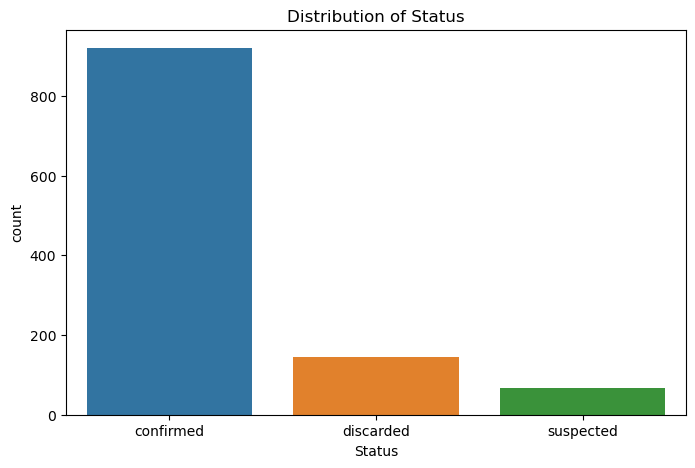

In [72]:
# Check class distribution for target variable (Status)
import seaborn as sns
target_variable = 'Status'
plt.figure(figsize=(8, 5))
sns.countplot(x=target_variable, data=mk)
plt.title(f'Distribution of {target_variable}')
plt.show()

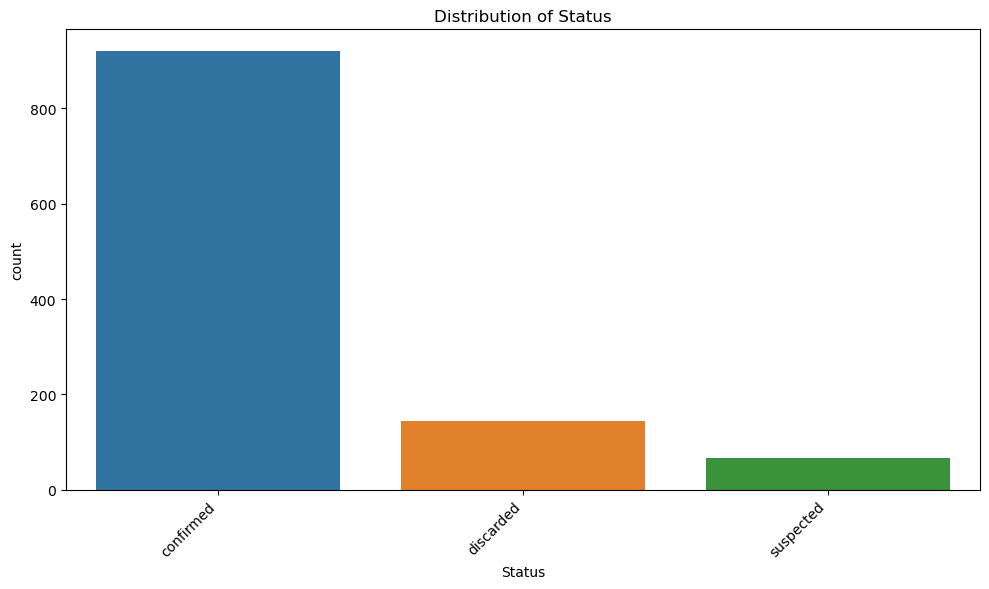

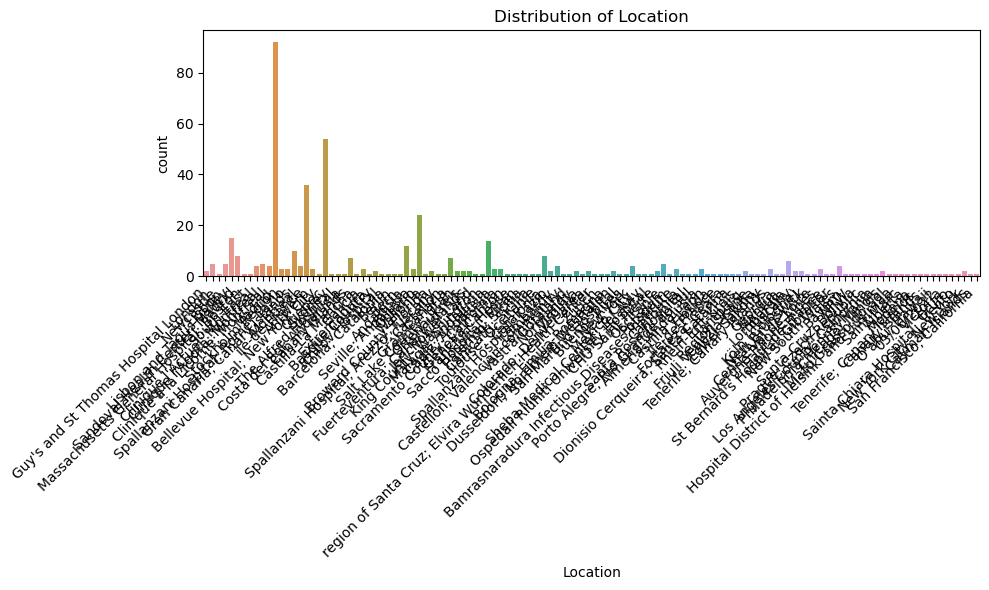

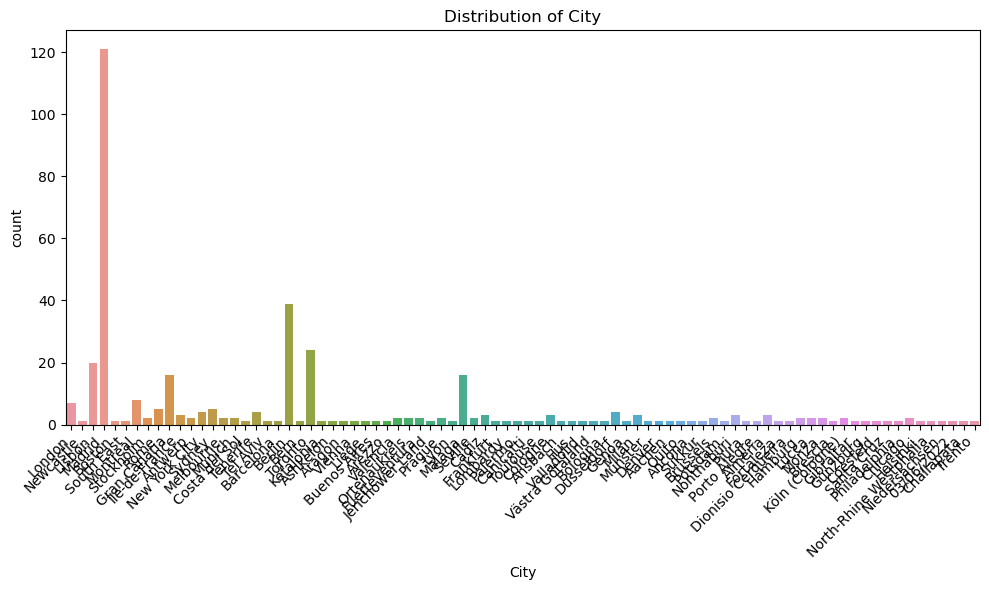

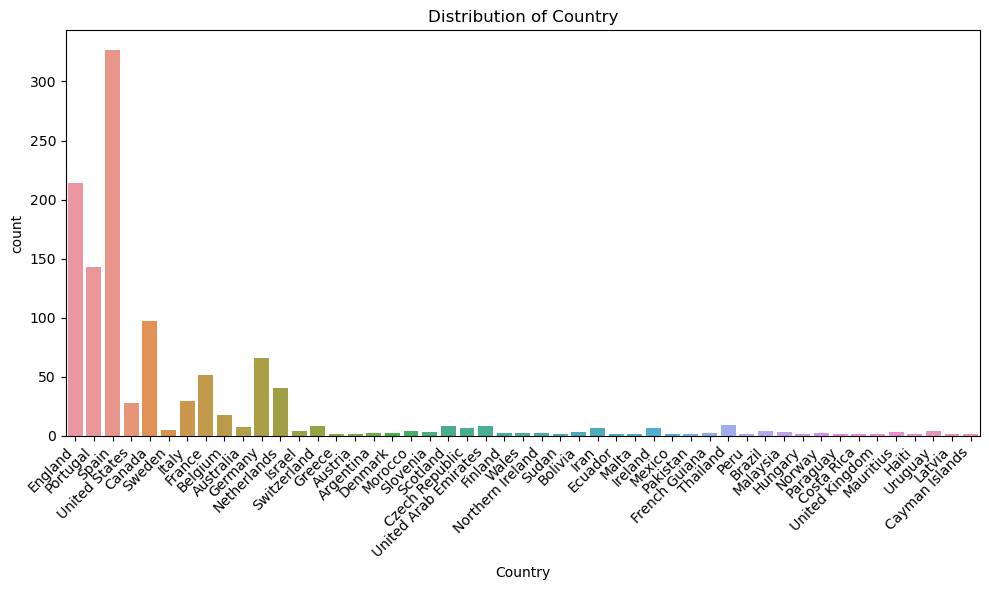

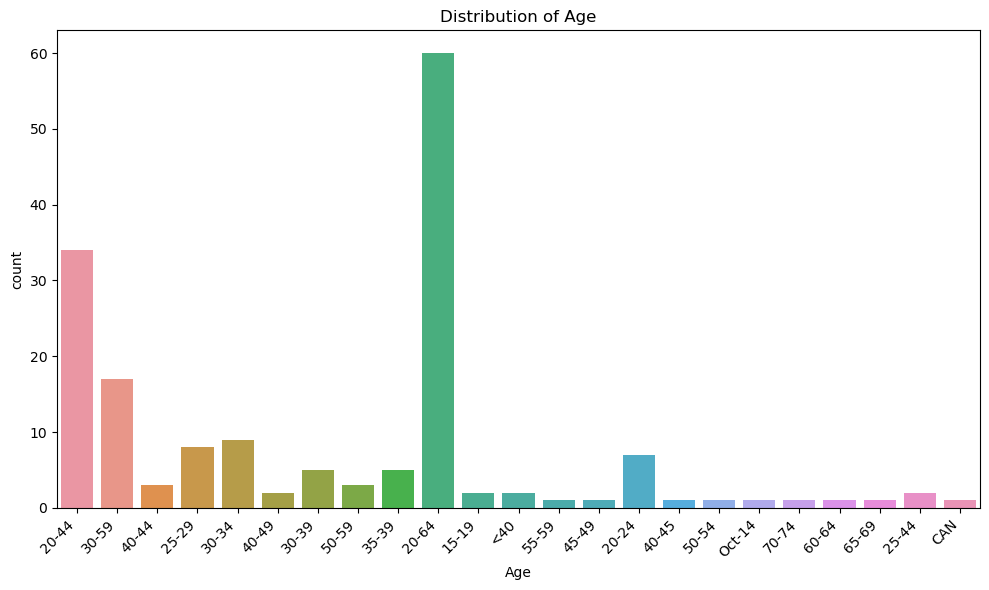

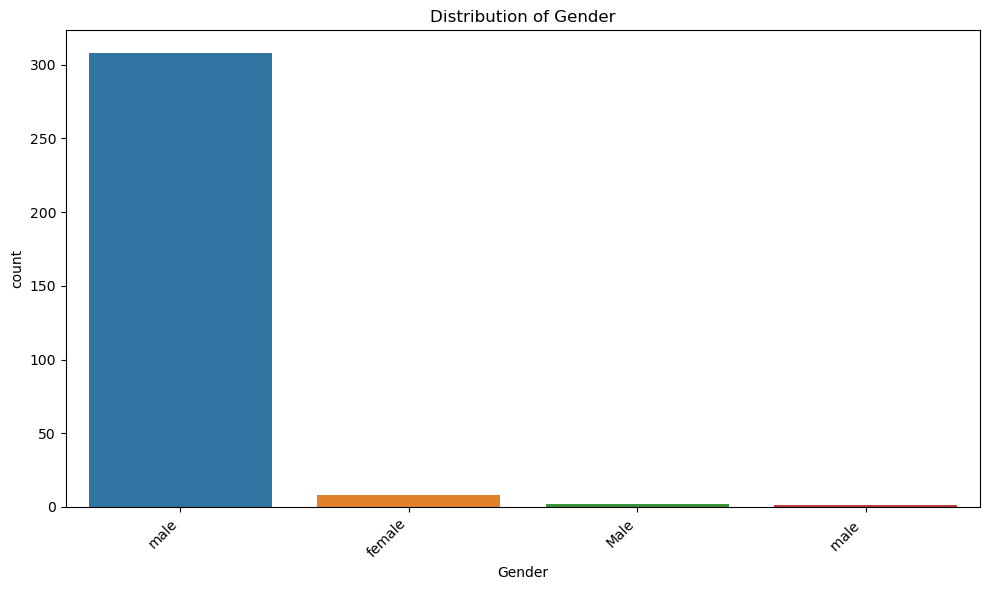

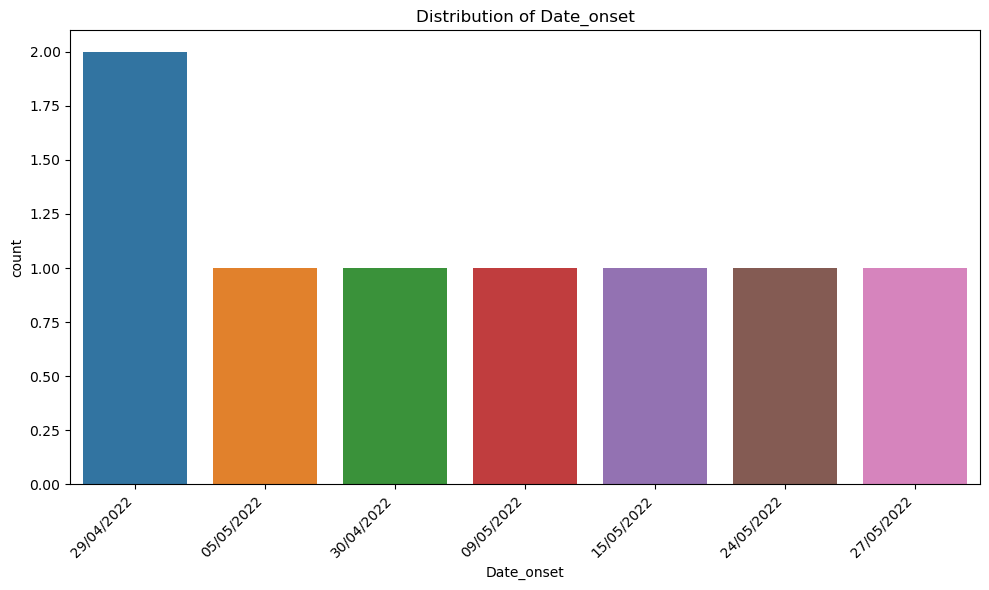

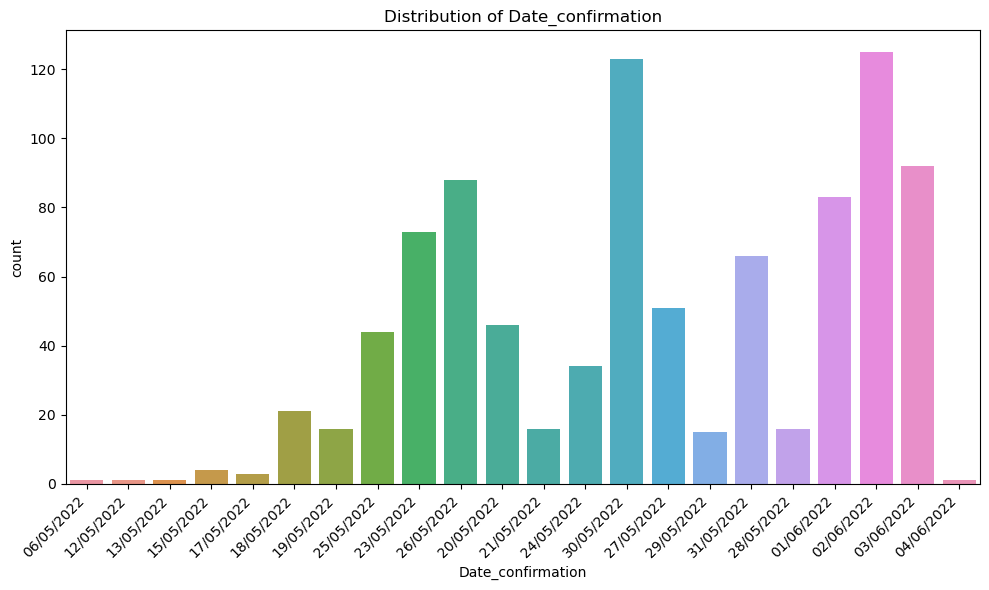

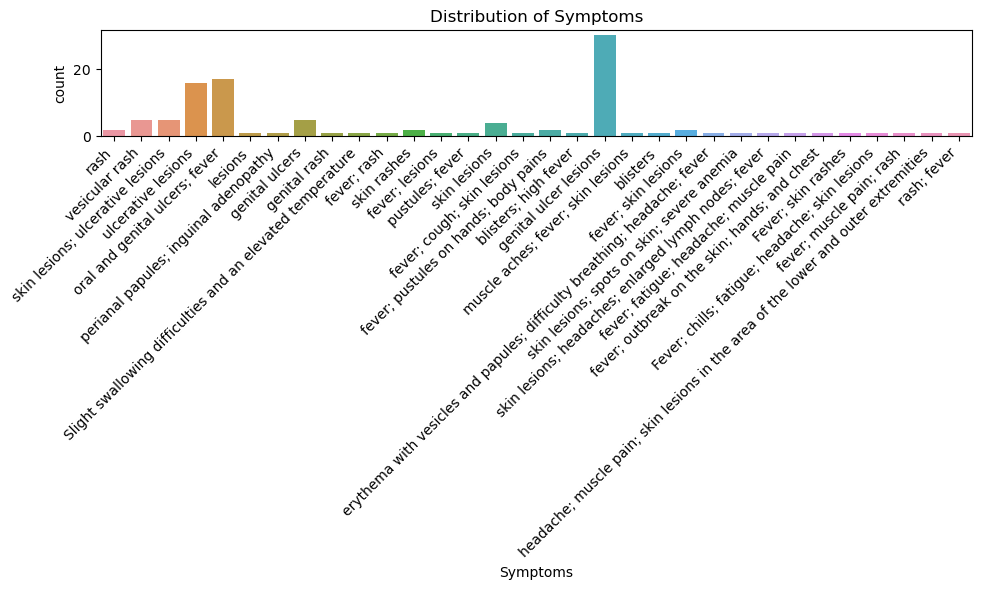

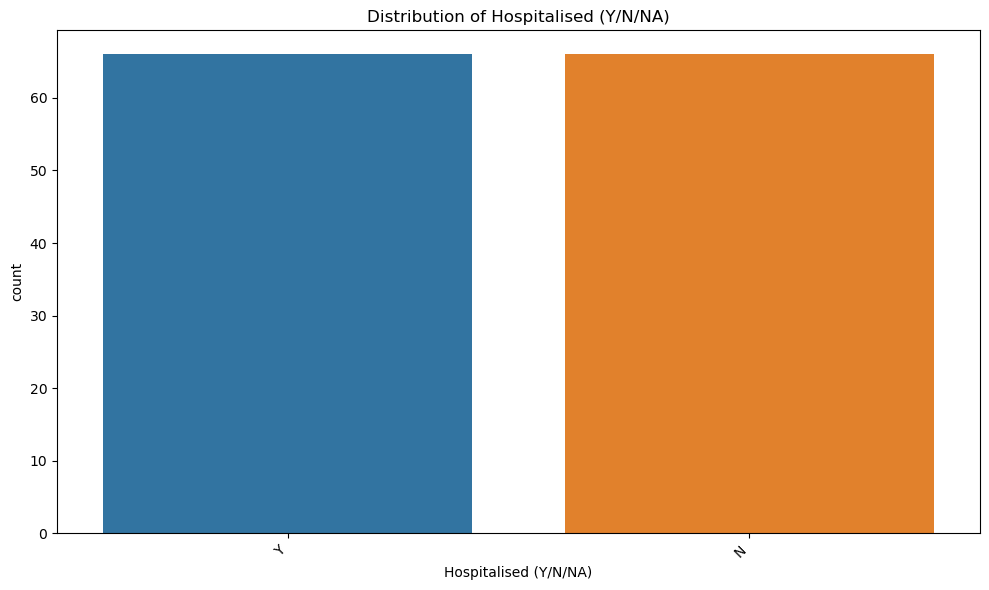

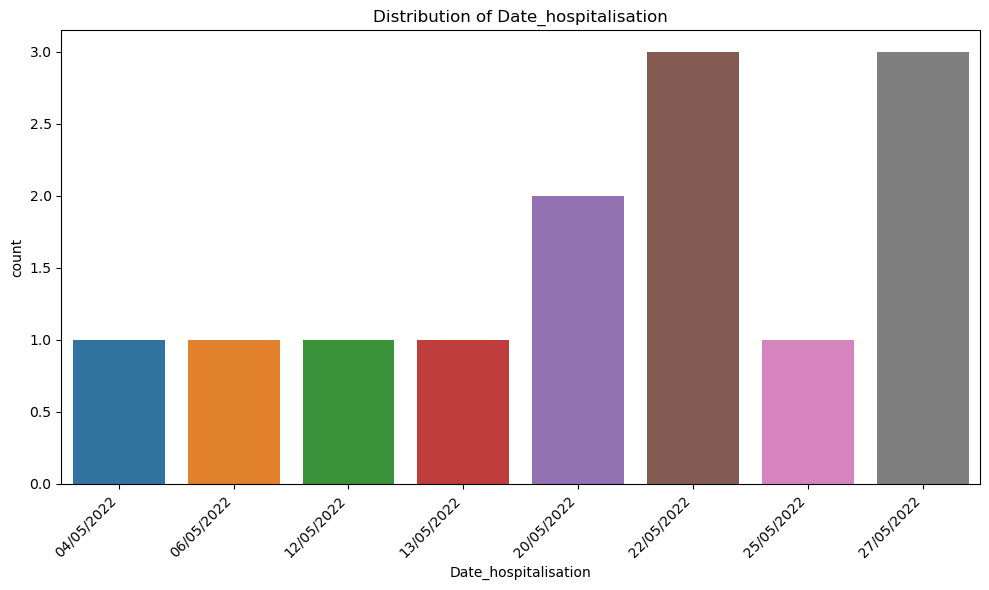

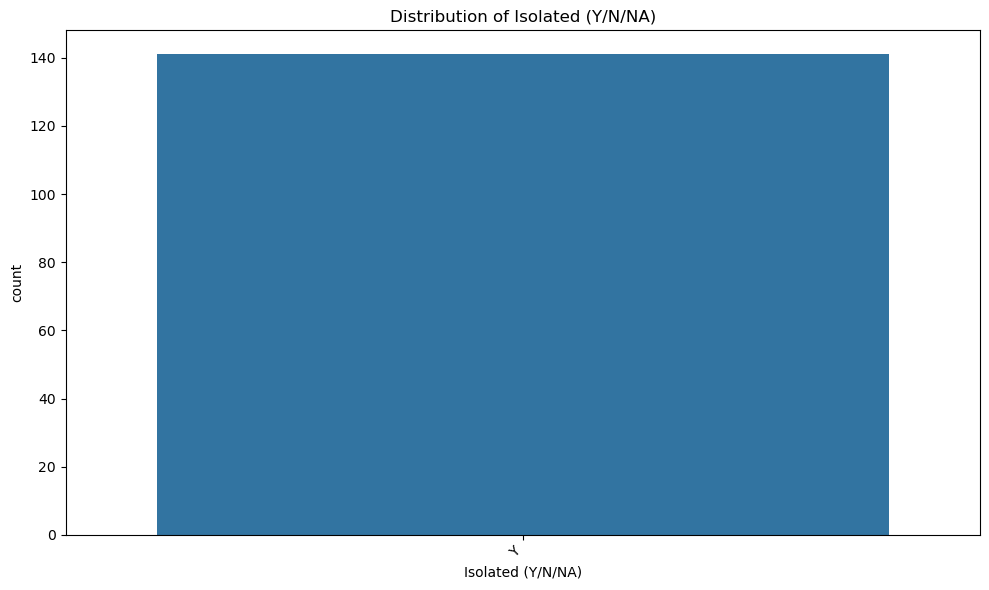

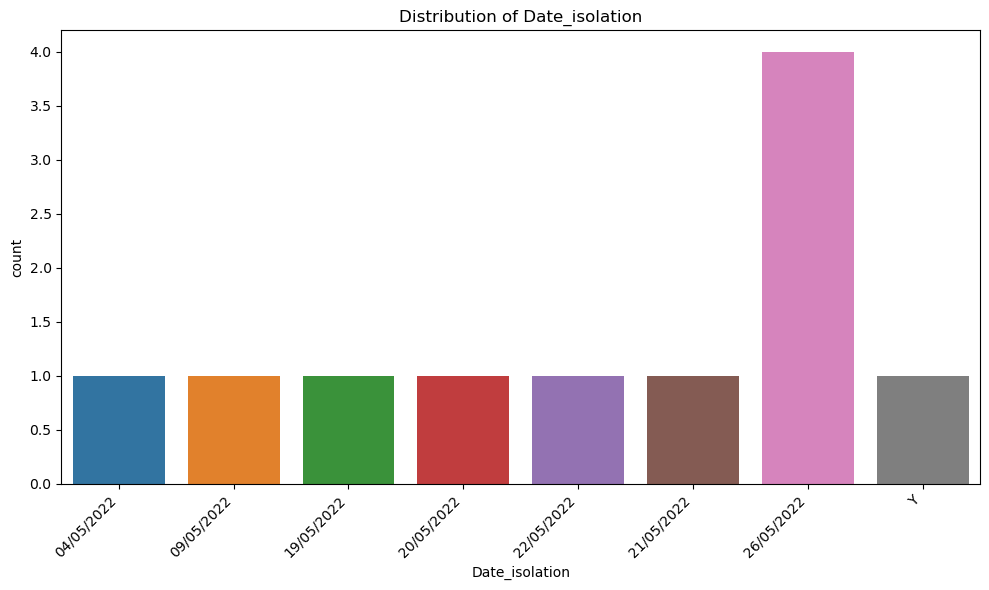

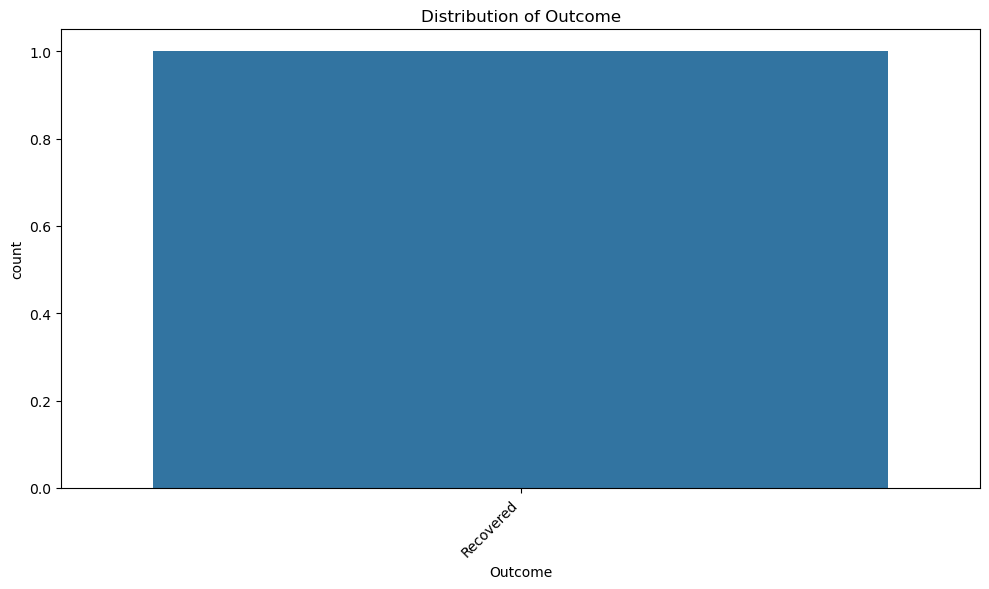

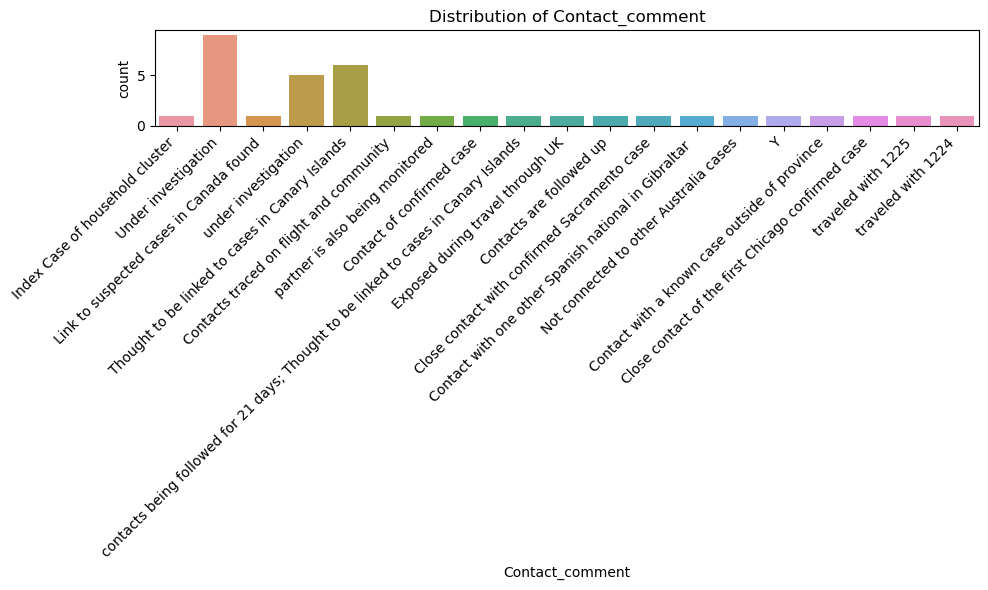

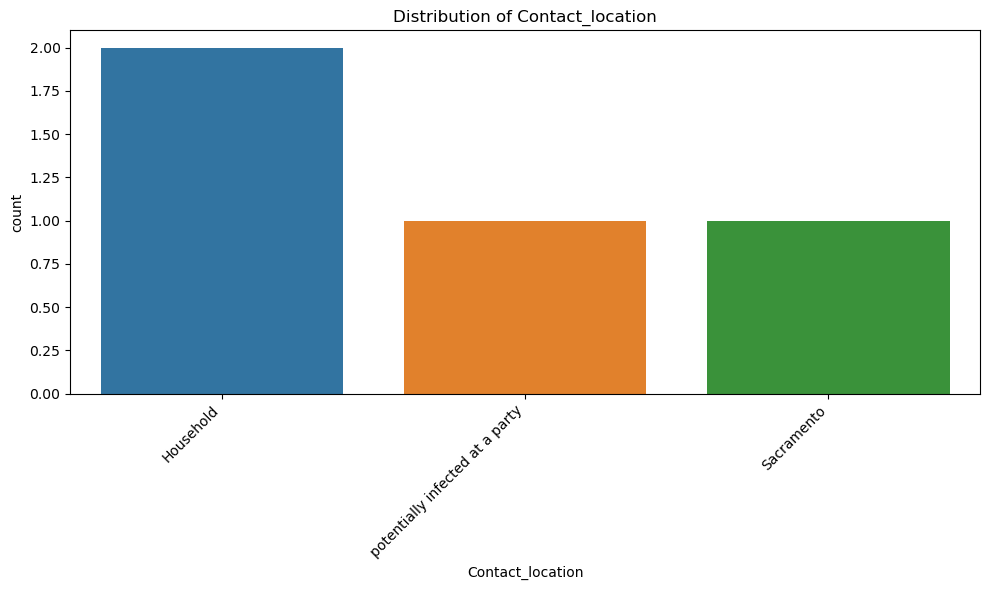

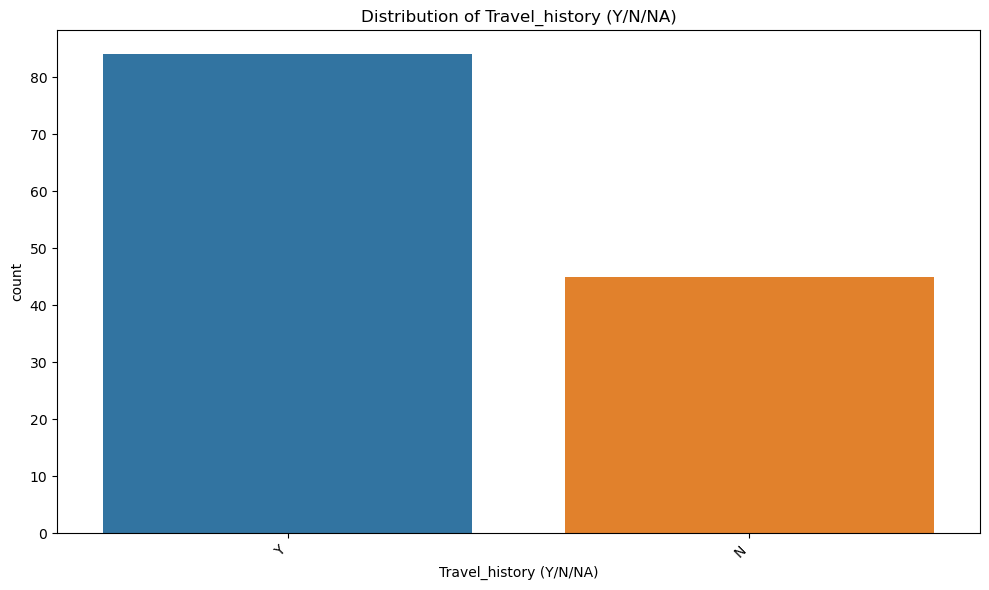

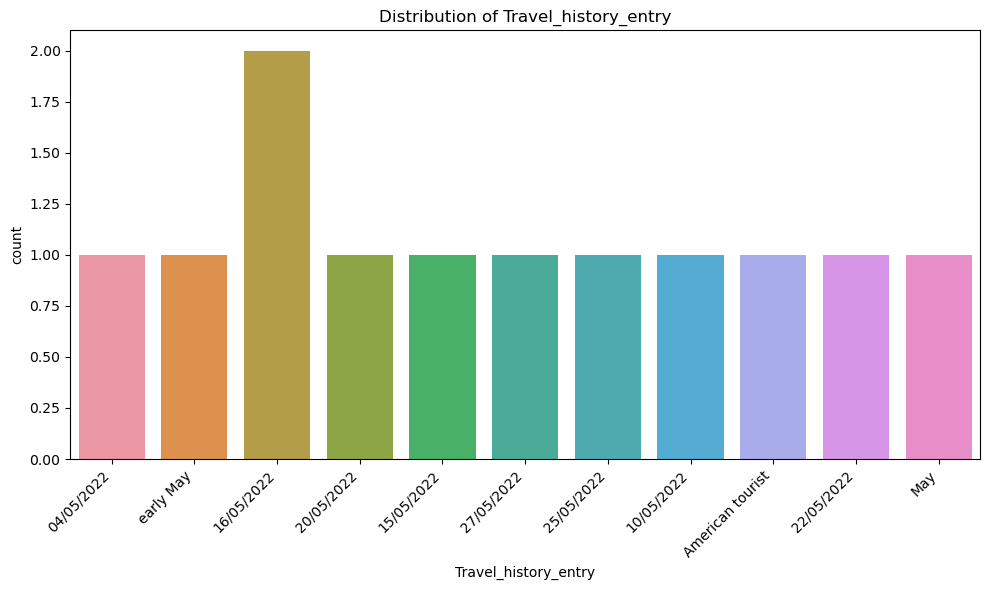

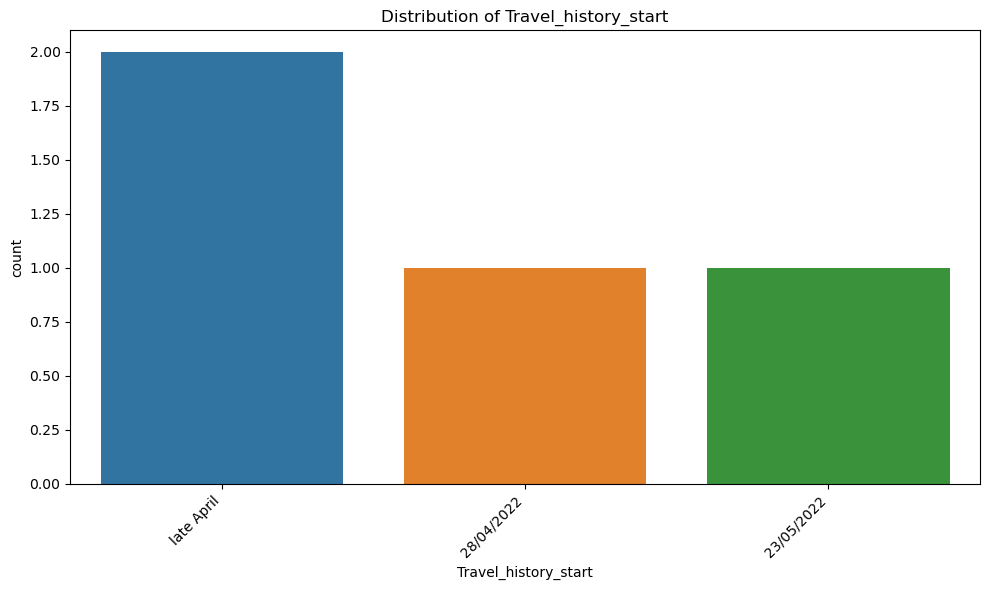

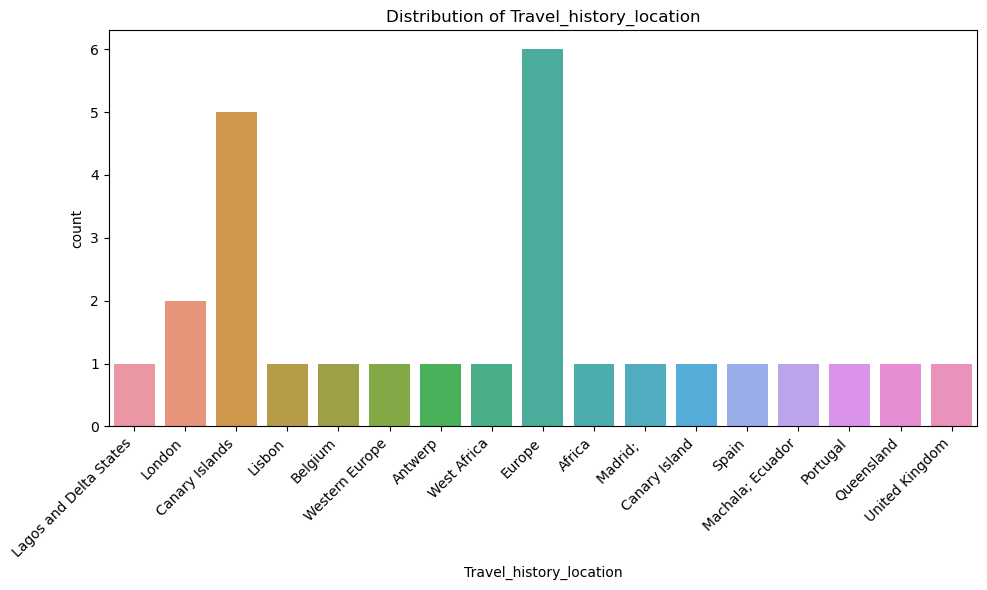

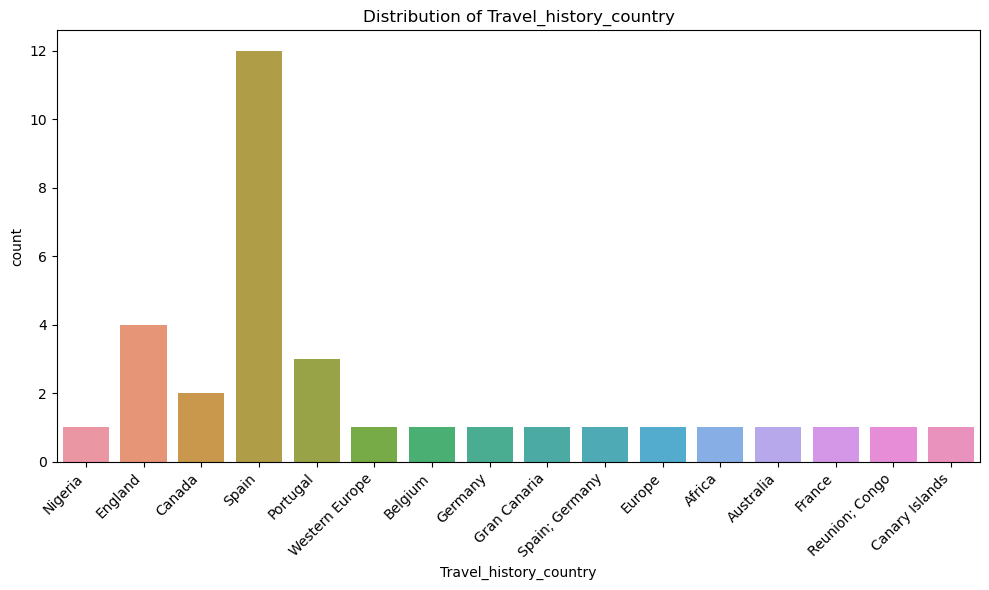

C:\Users\User\AppData\Local\Temp\ipykernel_25420\4141263075.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ensure the labels do not overlap


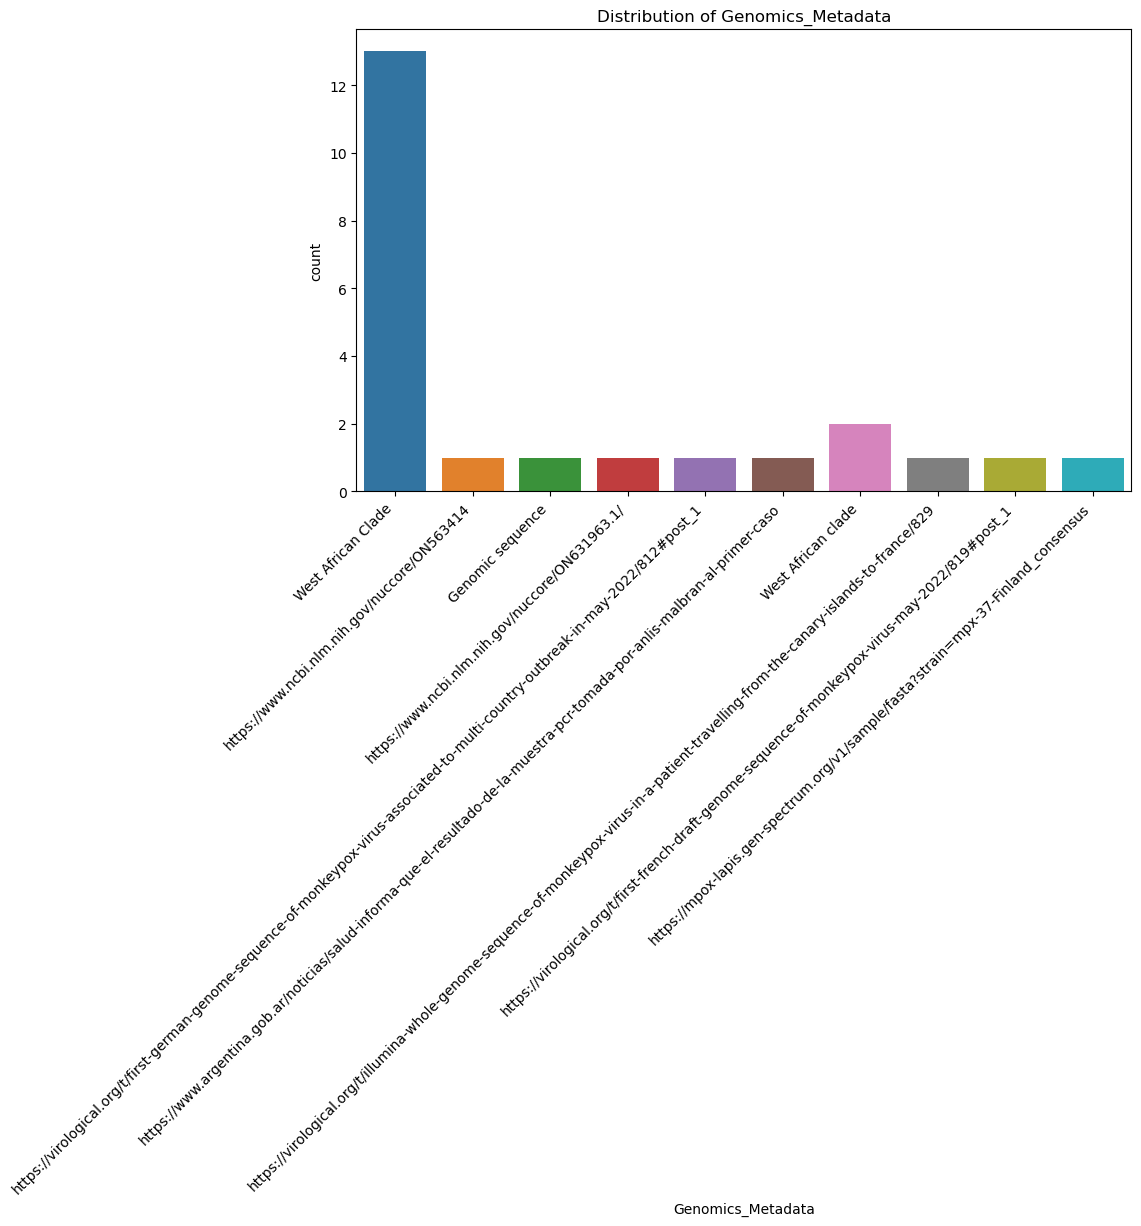

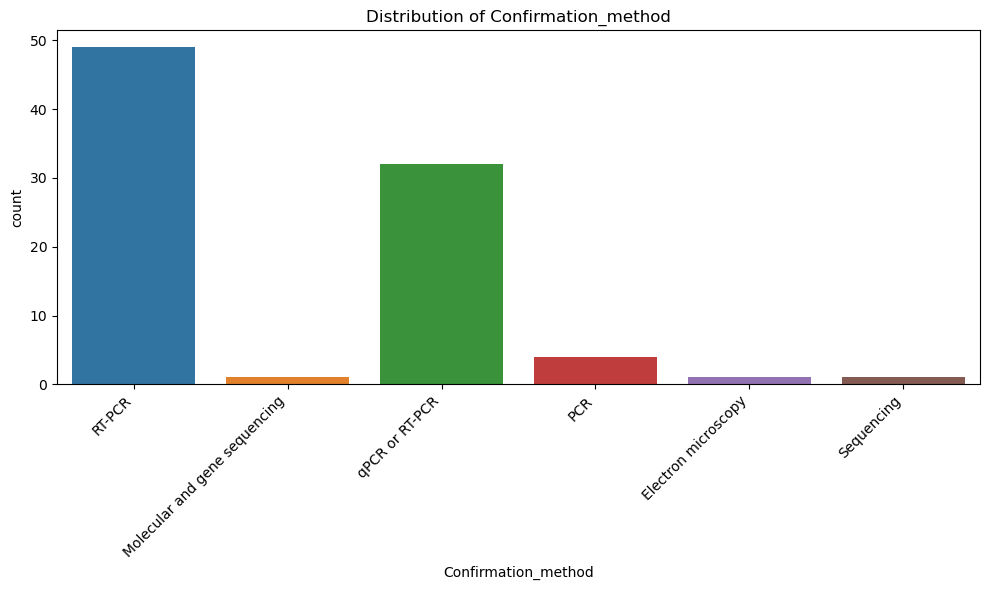

In [73]:
# Check distribution of categorical features
categorical_features = mk.select_dtypes(include=['object']).columns
for column in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=mk)
    plt.title(f'Distribution of {column}')
    
    plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels diagonally
    plt.tight_layout()  # Ensure the labels do not overlap
    plt.show()

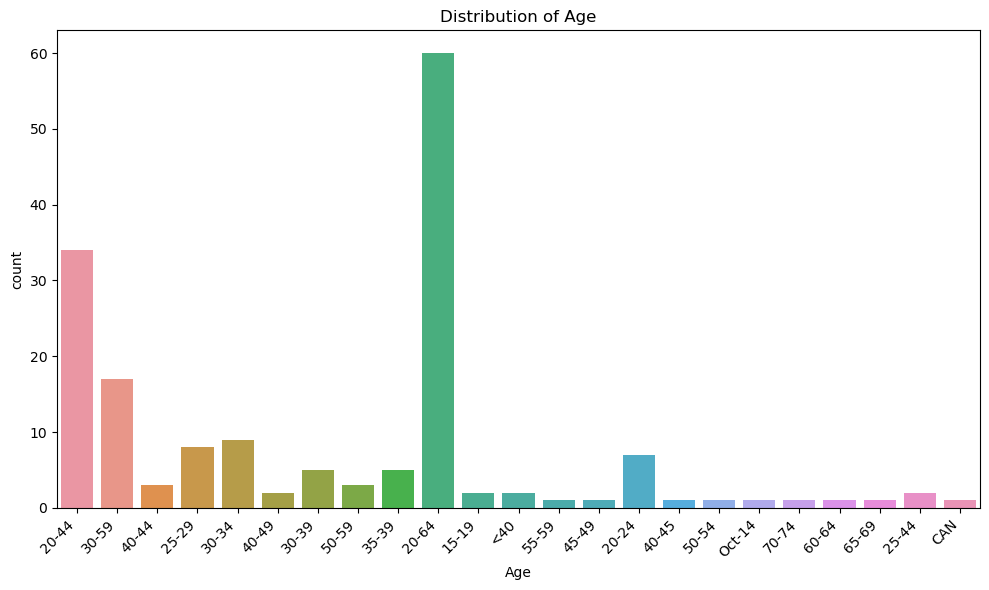

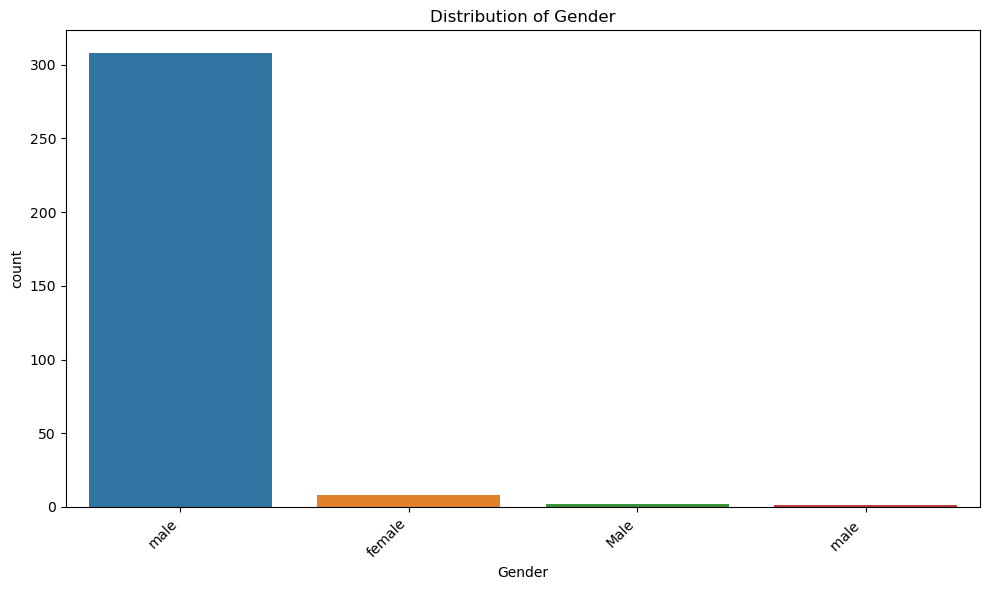

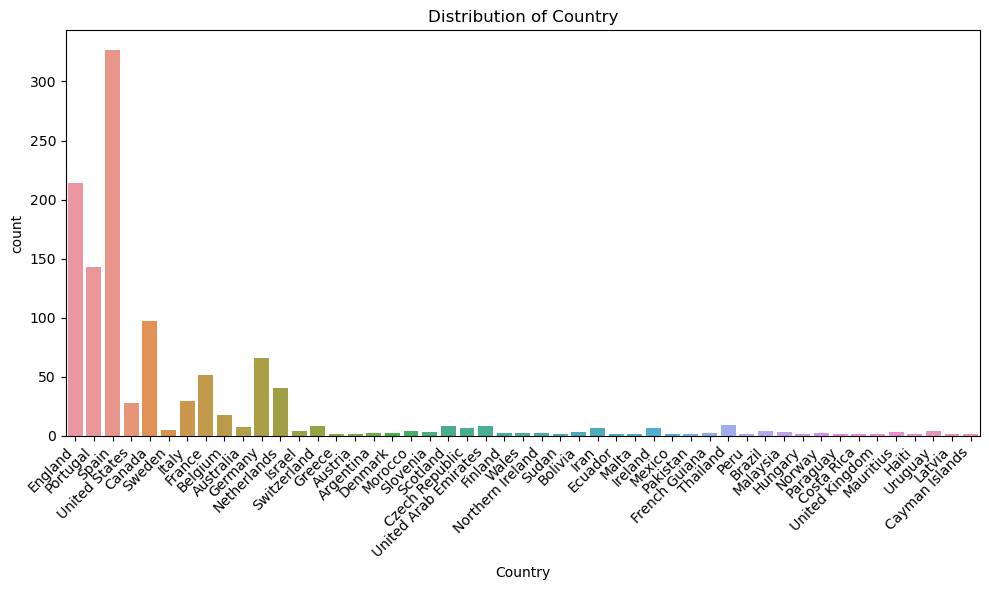

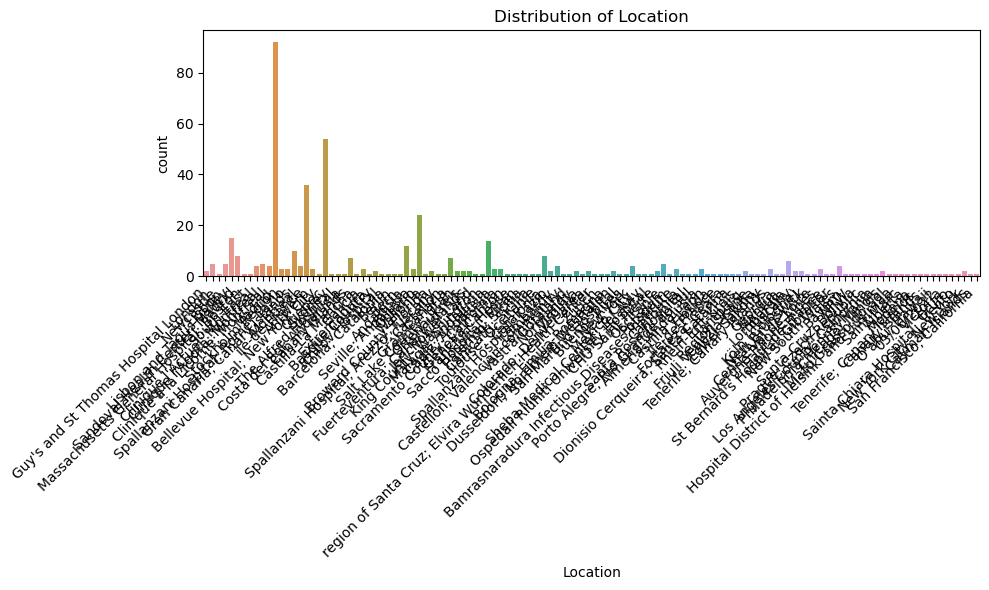

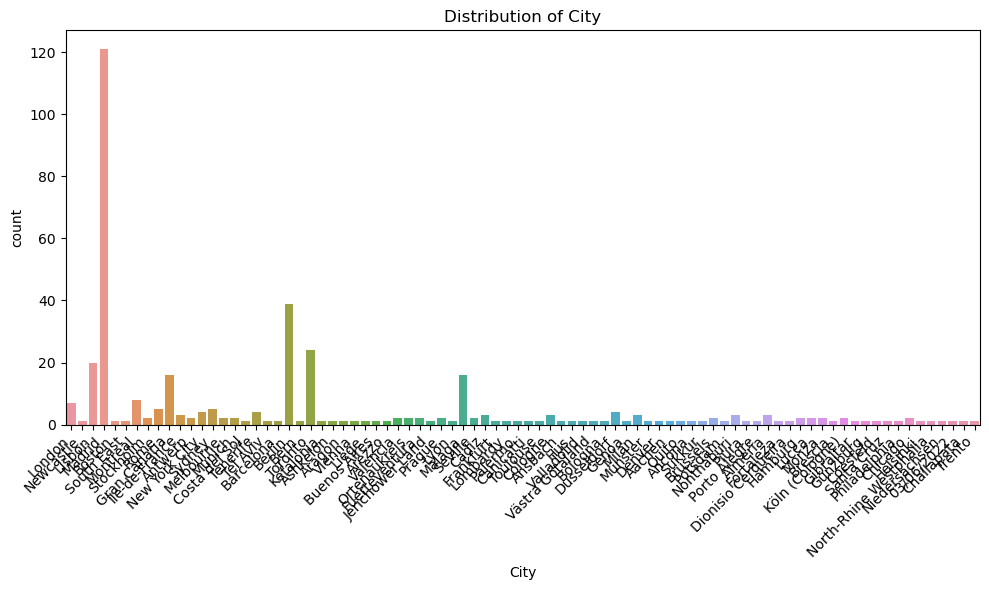

In [35]:
# Explore potential demographic biases
demographic_columns = ['Age', 'Gender', 'Country', 'Location', 'City']  # relevant demographic columns

for column in demographic_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=mk)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels diagonally
    plt.tight_layout()  # Ensure the labels do not overlap
    plt.show()

In [74]:
# Specify the file path to save the CSV file
#file_path = 'cleaned1_Monkeypox.csv'

# Save the cleaned DataFrame to a CSV file
#mk.to_csv(file_path, index=False)

#print(f"Dataset has been saved to: {file_path}")

Dataset has been saved to: cleaned1_Monkeypox.csv


## Dataset Cleaning

In [75]:
# Input missing values based on the nature of the column

# For numerical columns, mean or median imputation
numerical_columns = mk.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    mk[column].fillna(df[column].median(), inplace=True)

# For categorical columns, you can use mode imputation
categorical_columns = mk.select_dtypes(include=['object']).columns
for column in categorical_columns:
    mk[column].fillna(mk[column].mode()[0], inplace=True)

# Display the number of missing values after handling
print("\nMissing values after handling:")
print(mk.isnull().sum())


Missing values after handling:
Status                     0
Location                   0
City                       0
Country                    0
Age                        0
Gender                     0
Date_onset                 0
Date_confirmation          0
Symptoms                   0
Hospitalised (Y/N/NA)      0
Date_hospitalisation       0
Isolated (Y/N/NA)          0
Date_isolation             0
Outcome                    0
Contact_comment            0
Contact_location           0
Travel_history (Y/N/NA)    0
Travel_history_entry       0
Travel_history_start       0
Travel_history_location    0
Travel_history_country     0
Genomics_Metadata          0
Confirmation_method        0
dtype: int64


In [76]:
mk.head()

Status                             Location    City  Country    Age  \
0  confirmed  Guy's and St Thomas Hospital London  London  England  20-64   
1  confirmed  Guy's and St Thomas Hospital London  London  England  20-64   
2  confirmed                               London  London  England  20-64   
3  confirmed                               London  London  England  20-64   
4  confirmed                               London  London  England  20-64   

  Gender  Date_onset Date_confirmation        Symptoms Hospitalised (Y/N/NA)  \
0   male  29/04/2022        06/05/2022            rash                     Y   
1   male  05/05/2022        12/05/2022            rash                     Y   
2   male  30/04/2022        13/05/2022  vesicular rash                     N   
3   male  29/04/2022        15/05/2022  vesicular rash                     Y   
4   male  29/04/2022        15/05/2022  vesicular rash                     Y   

   ...    Outcome                  Contact_comment Contact_location  \
0  ...  Recovered              Under investigation        Household   
1  ...  Recovered  Index Case of household cluster        Household   
2  ...  Recovered              Under investigation        Household   
3  ...  Recovered              Under investigation        Household   
4  ...  Recovered              Under investigation        Household   

  Travel_history (Y/N/NA) Travel_history_entry Travel_history_start  \
0                       Y           04/05/2022           late April   
1                       N           16/05/2022           late April   
2                       N           16/05/2022           late April   
3                       N           16/05/2022           late April   
4                       N           16/05/2022           late April   

  Travel_history_location Travel_history_country   Genomics_Metadata  \
0  Lagos and Delta States                Nigeria  West African Clade   
1                  Europe                  Spain  West African Clade   
2                  Europe                  Spain  West African Clade   
3                  Europe                  Spain  West African Clade   
4                  Europe                  Spain  West African Clade   

  Confirmation_method  
0              RT-PCR  
1              RT-PCR  
2              RT-PCR  
3              RT-PCR  
4              RT-PCR  

[5 rows x 23 columns]

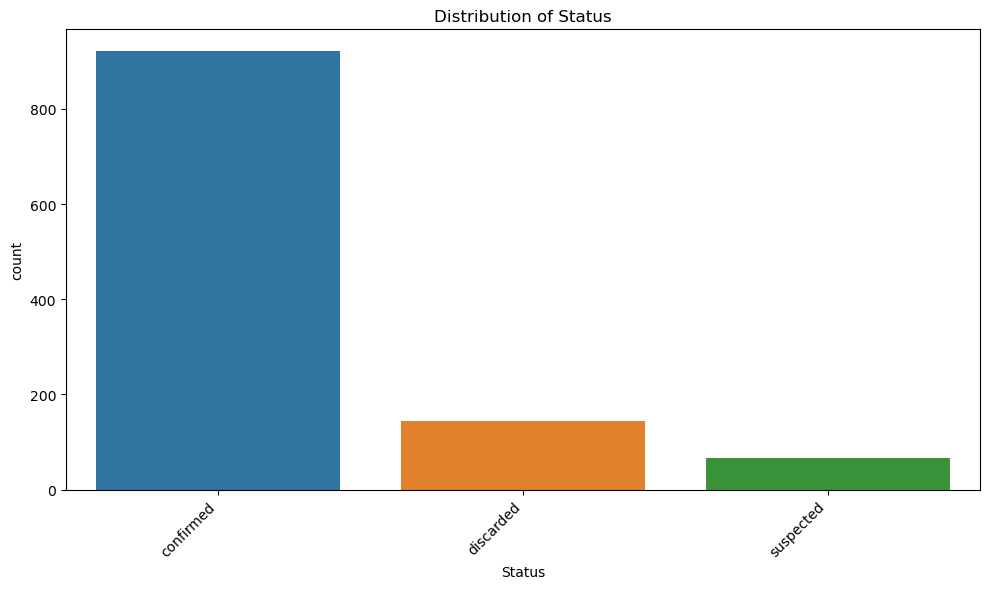

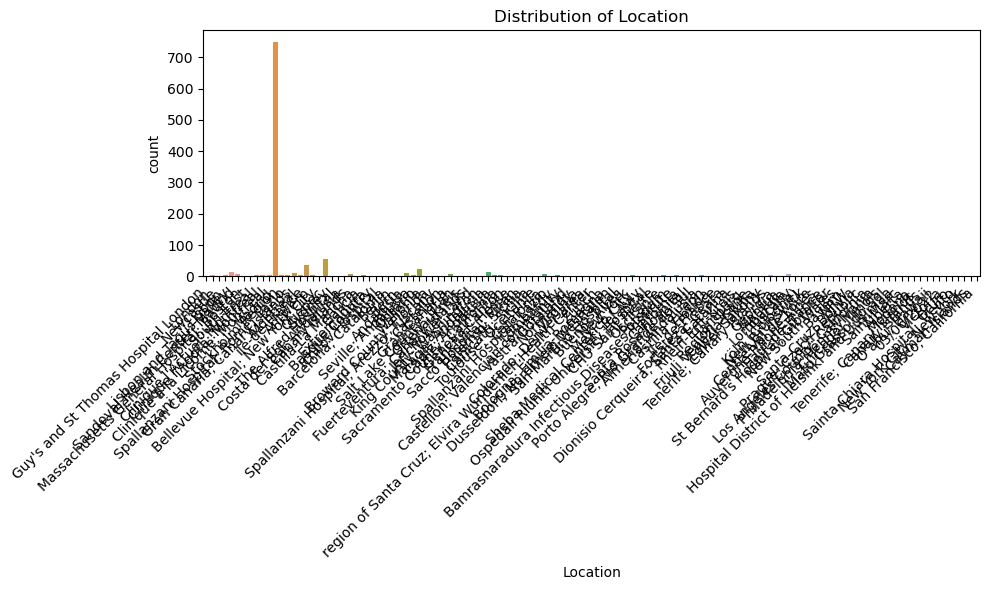

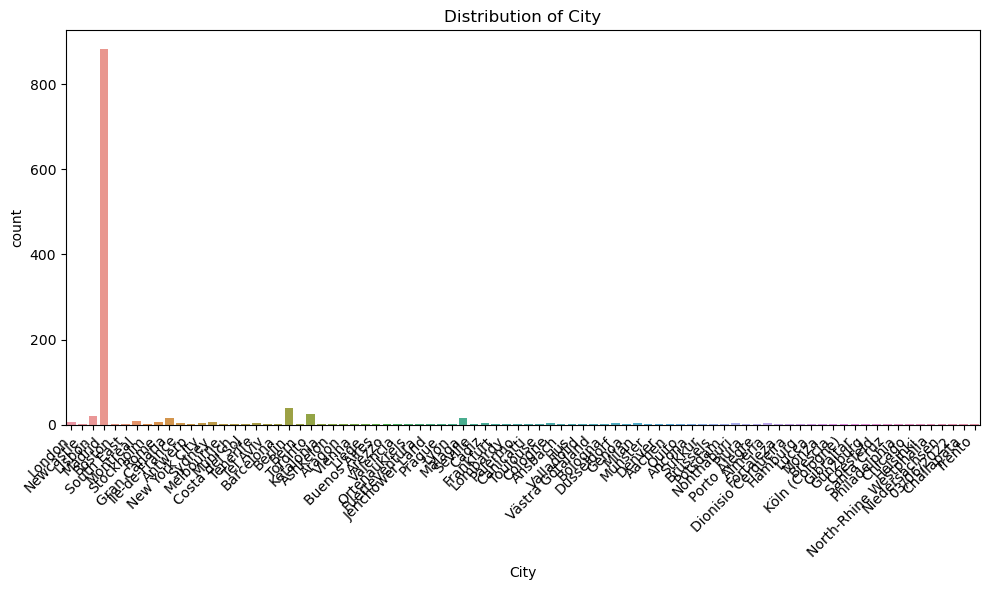

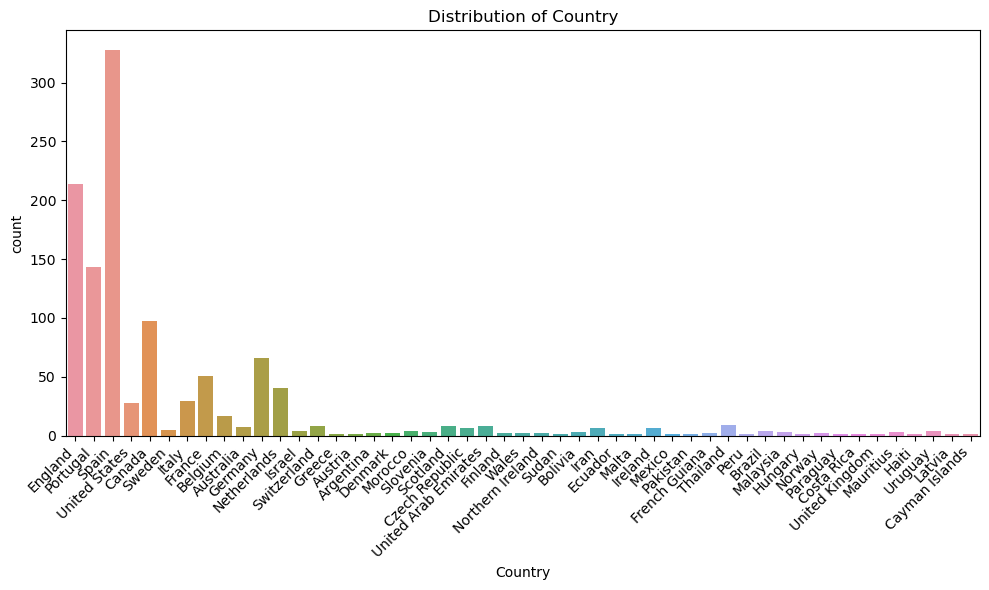

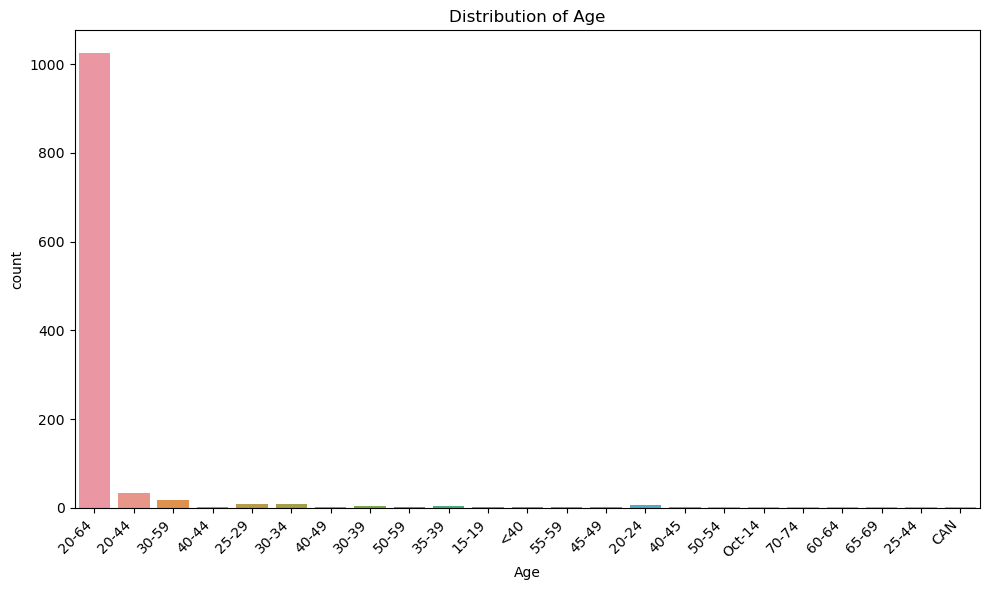

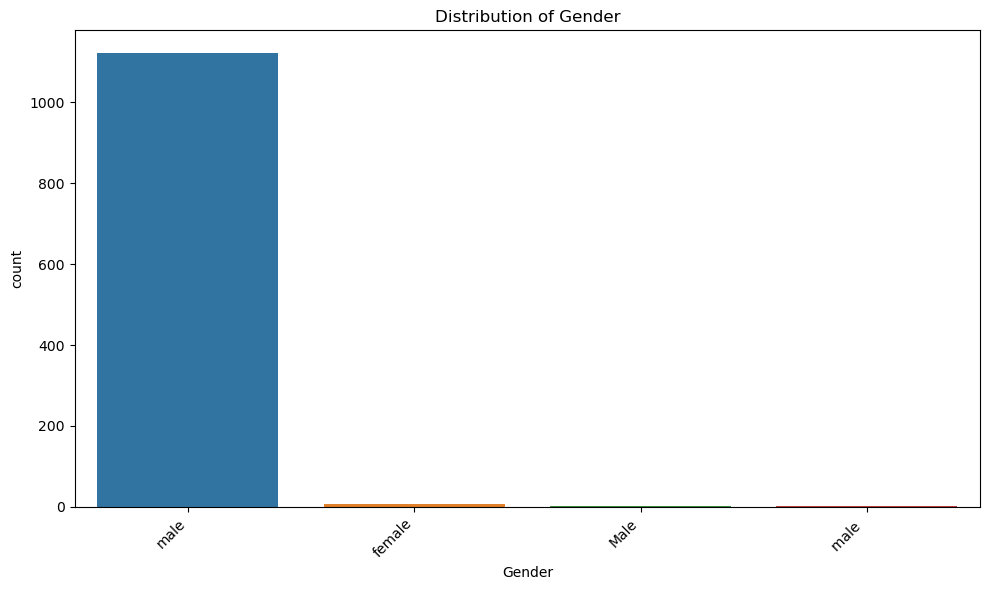

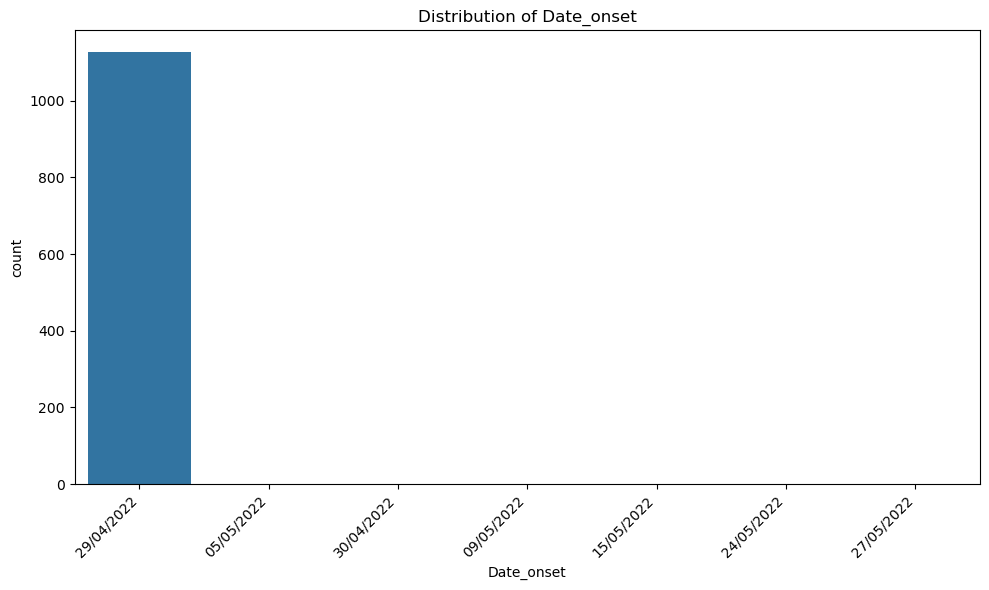

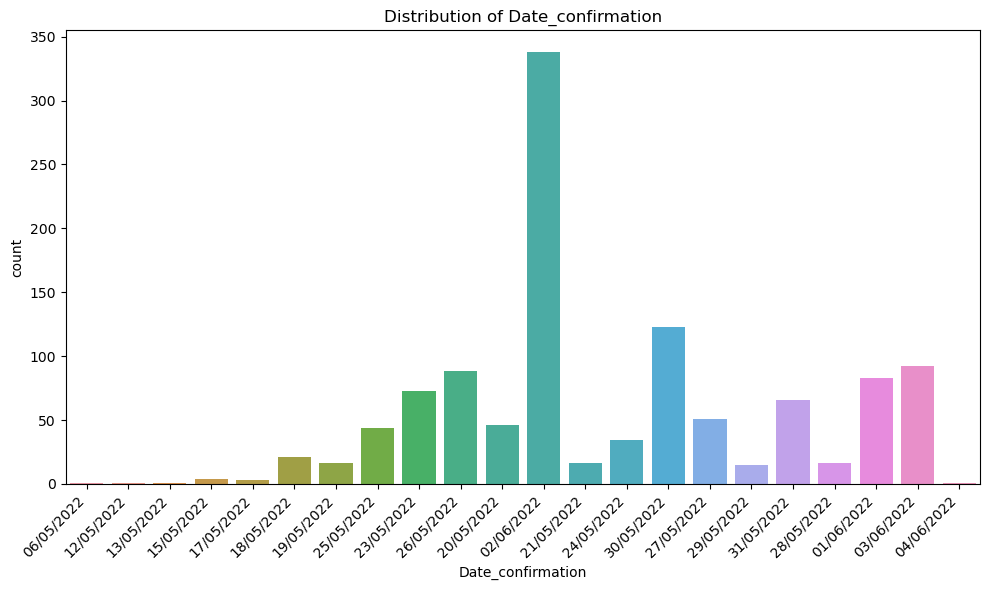

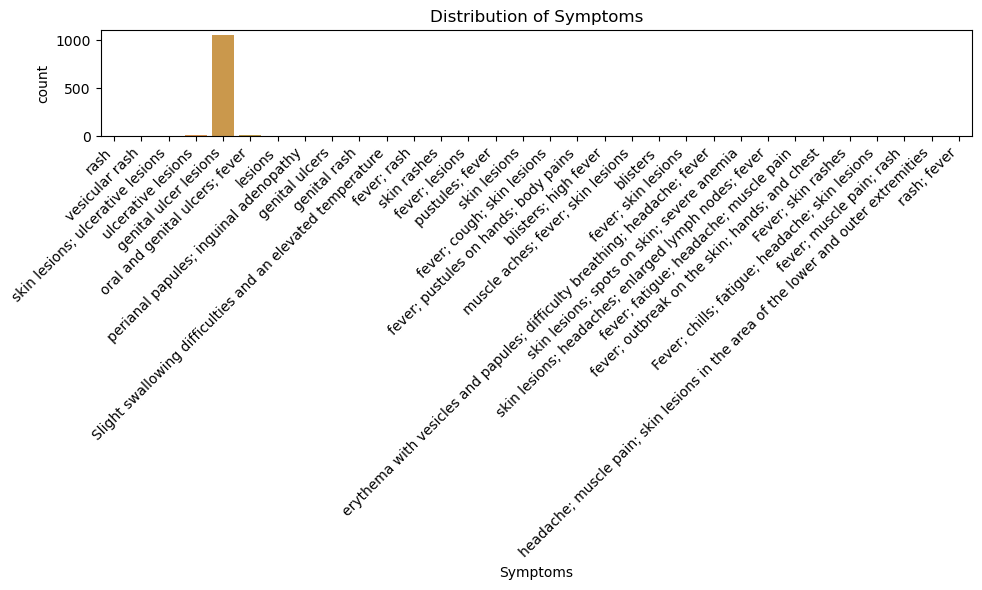

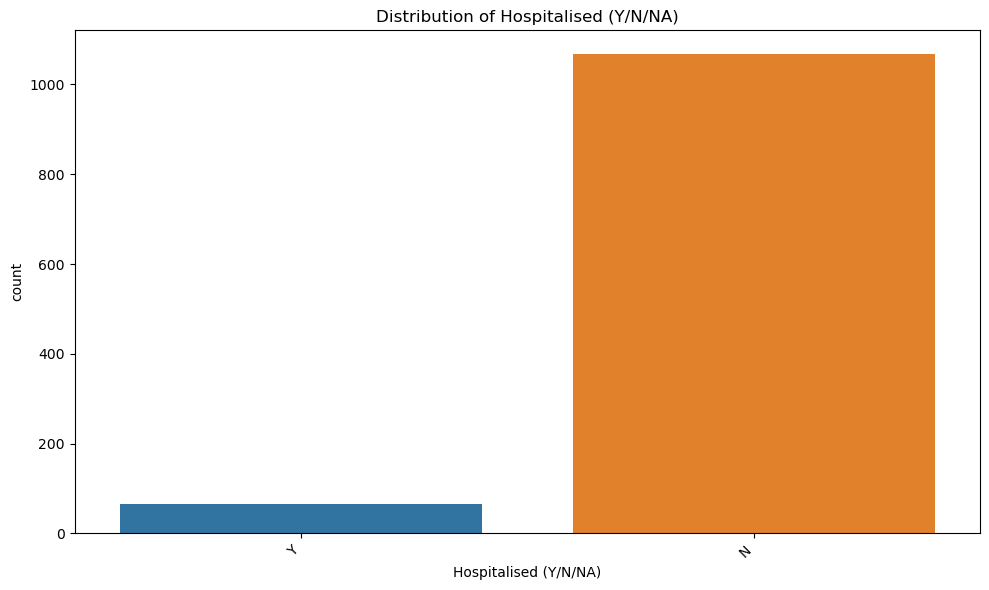

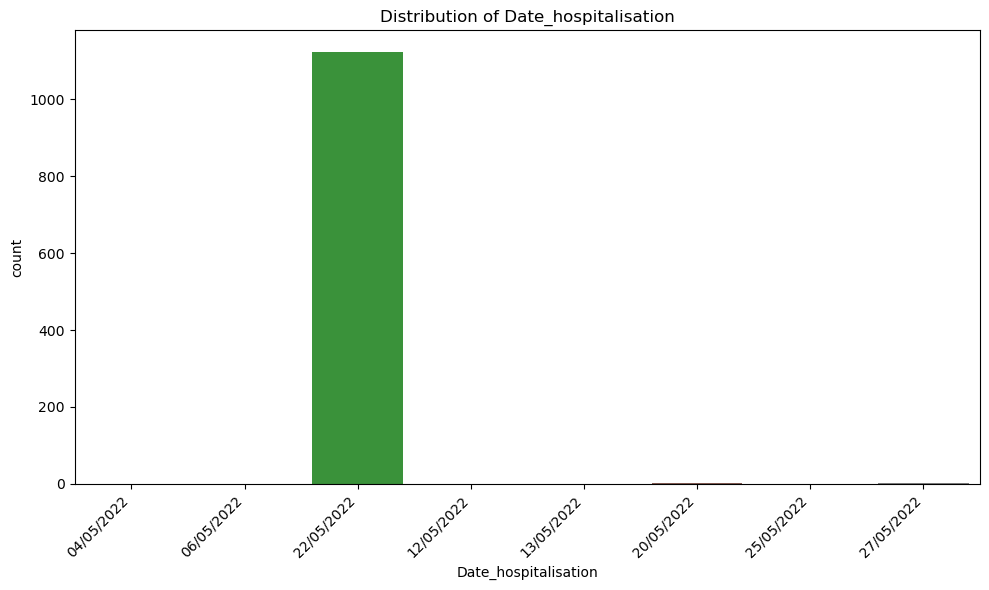

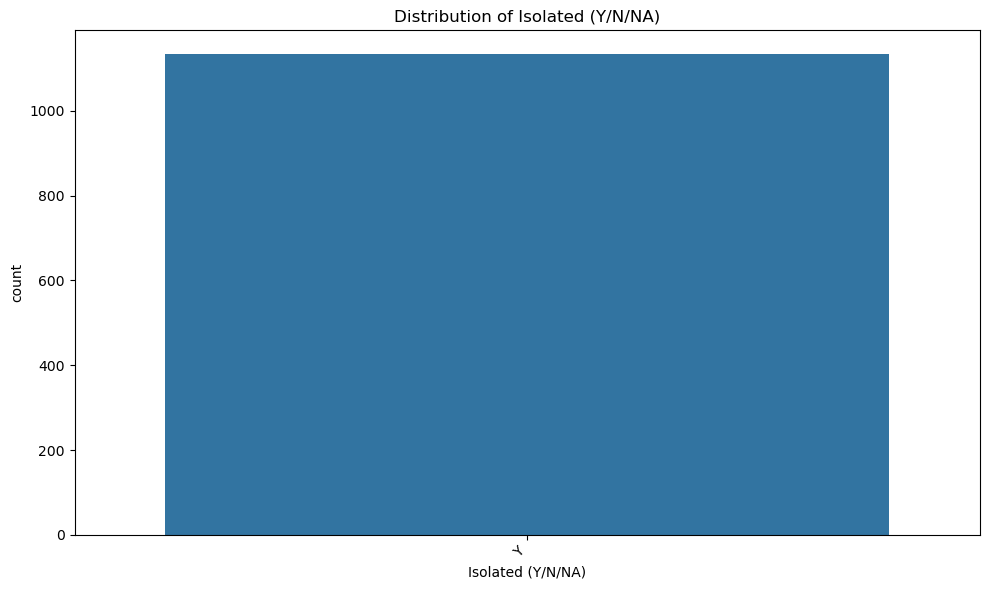

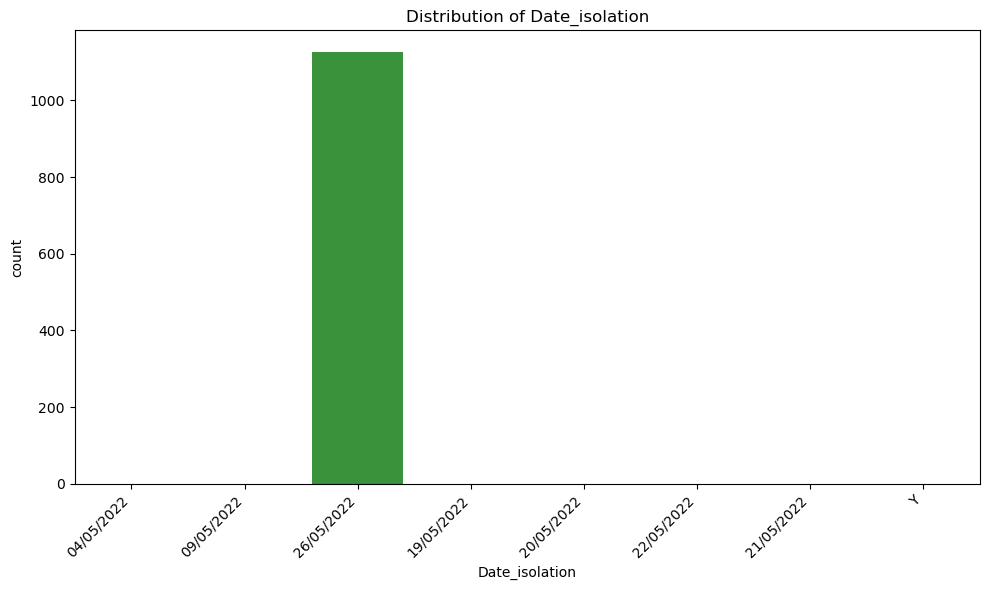

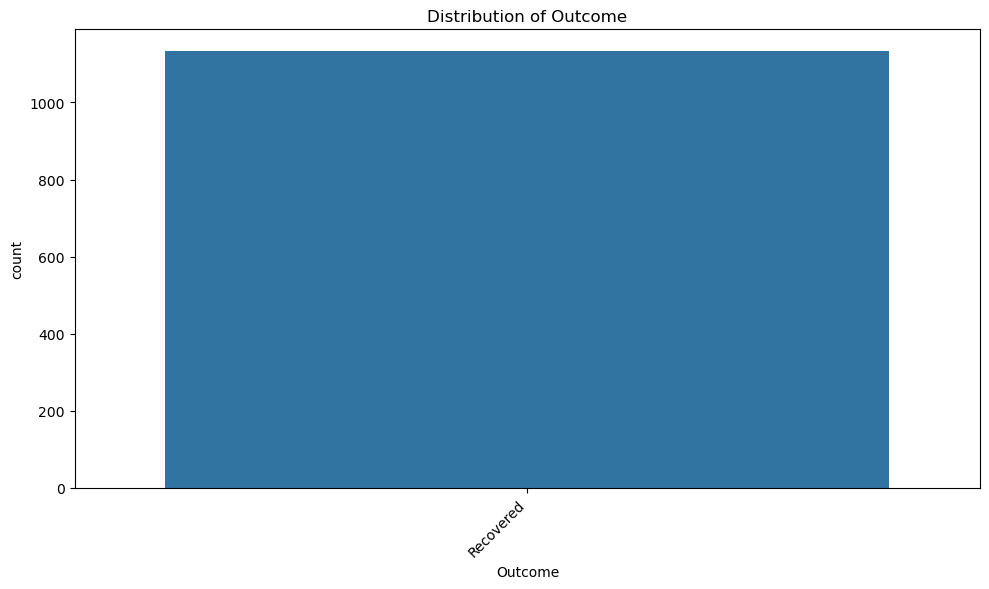

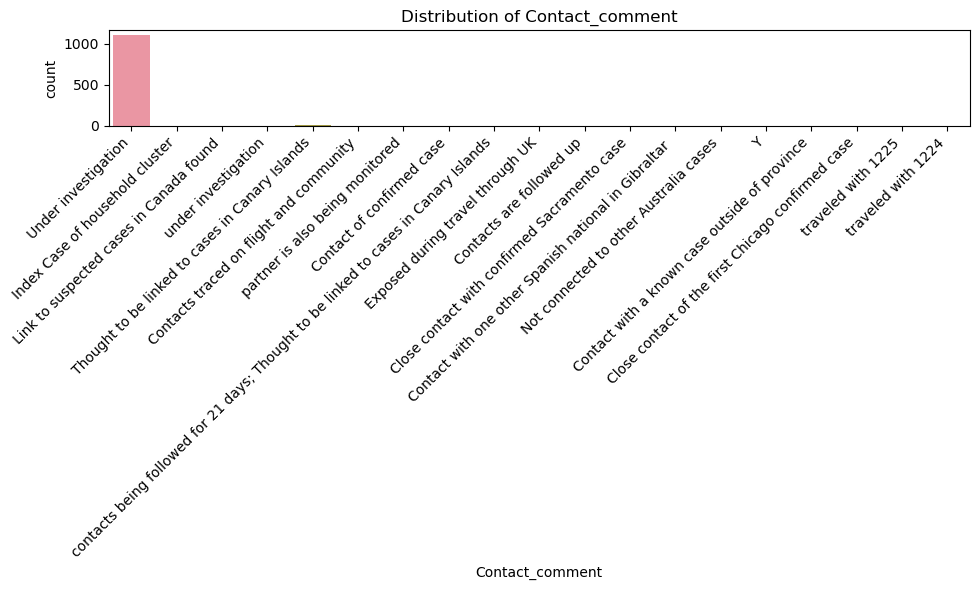

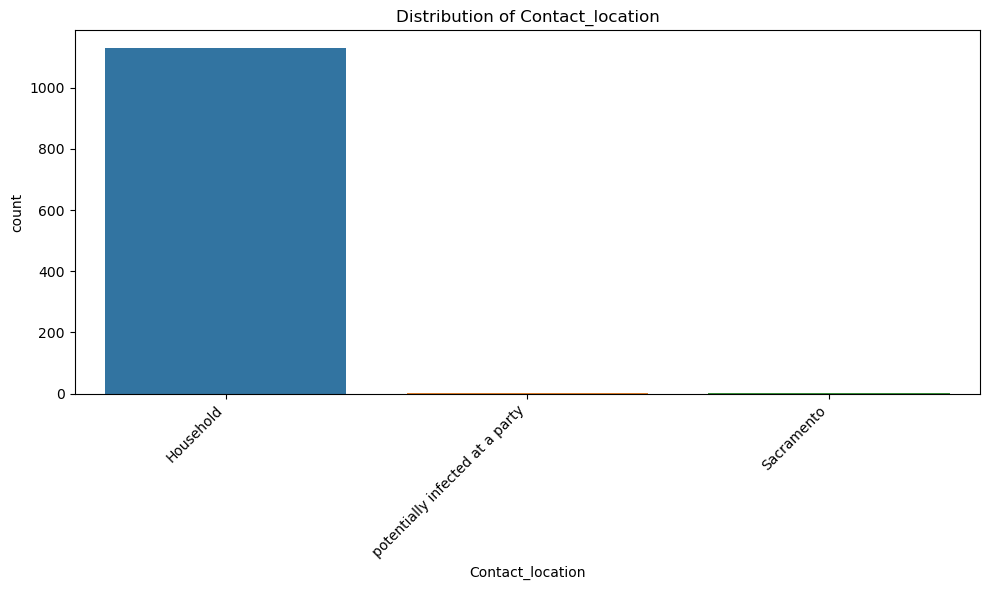

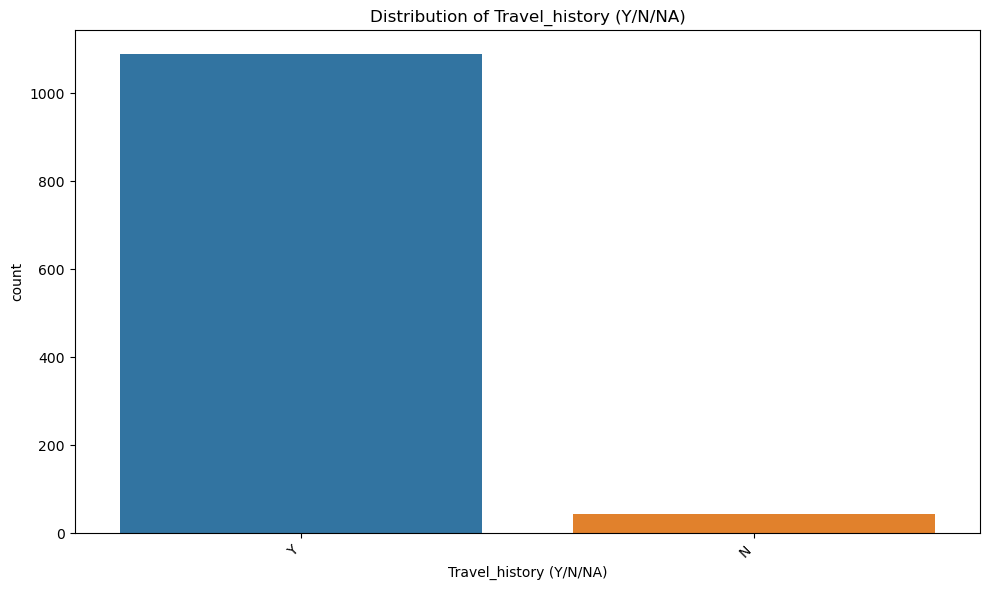

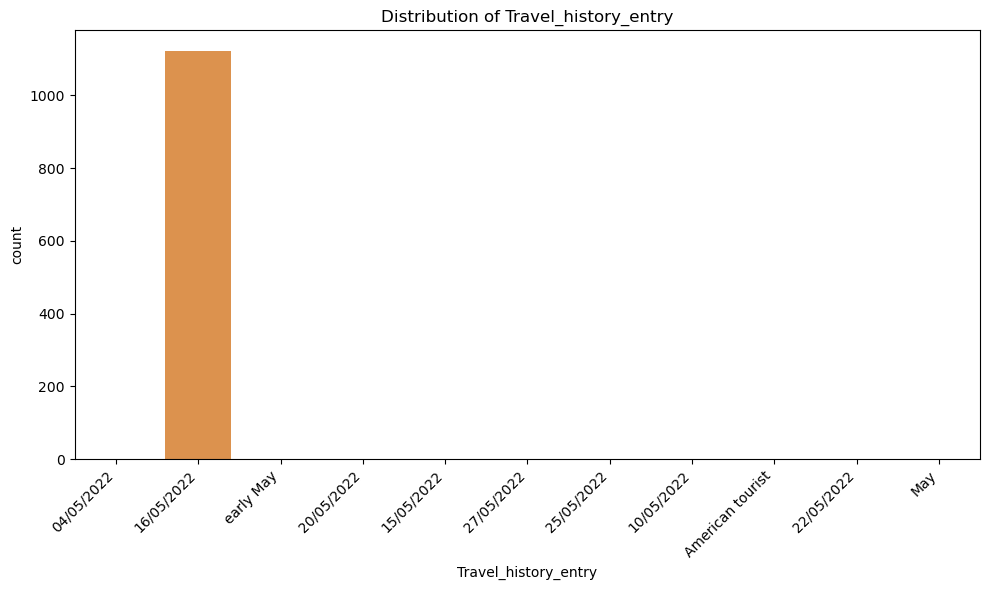

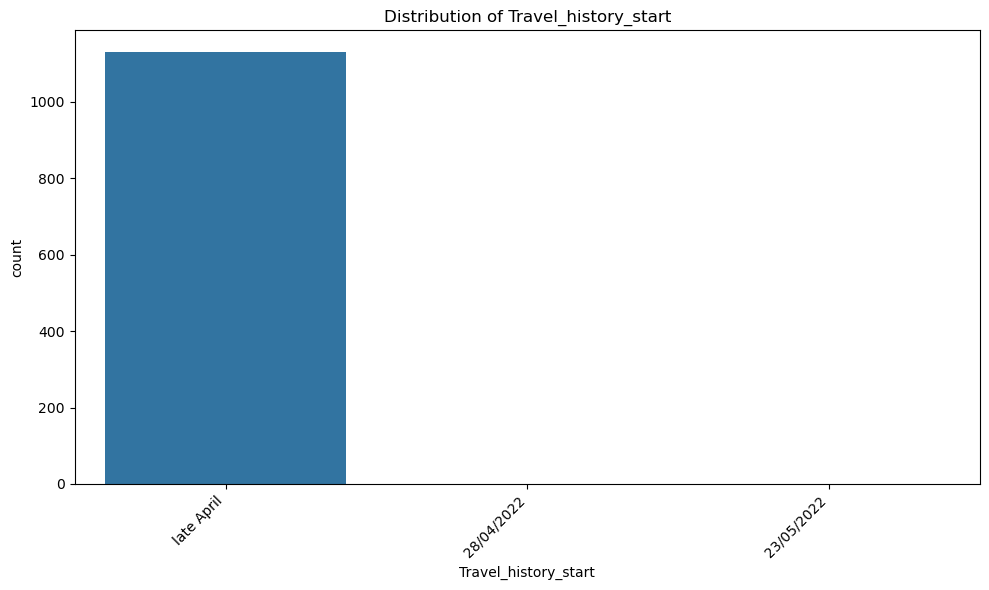

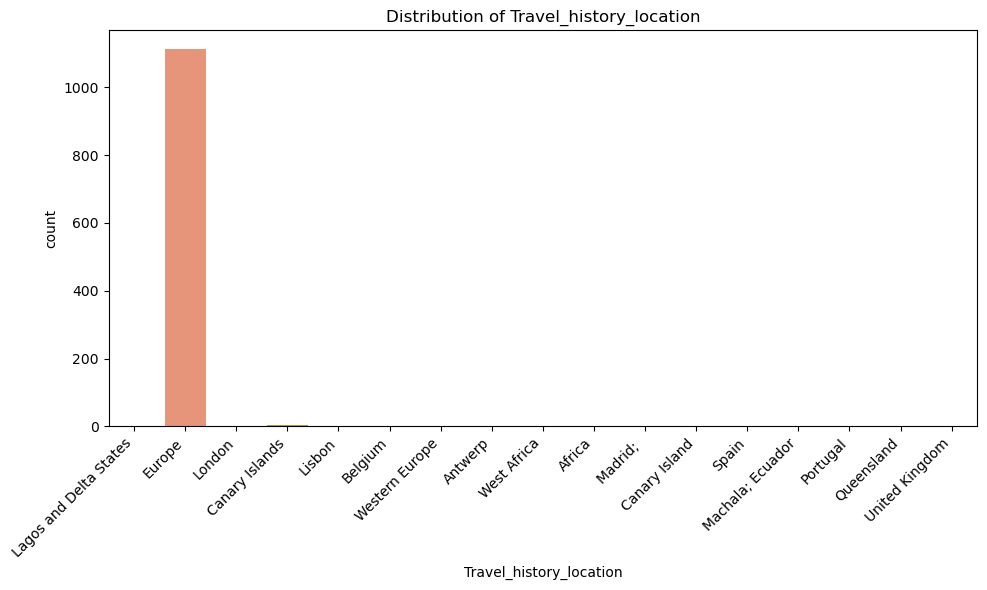

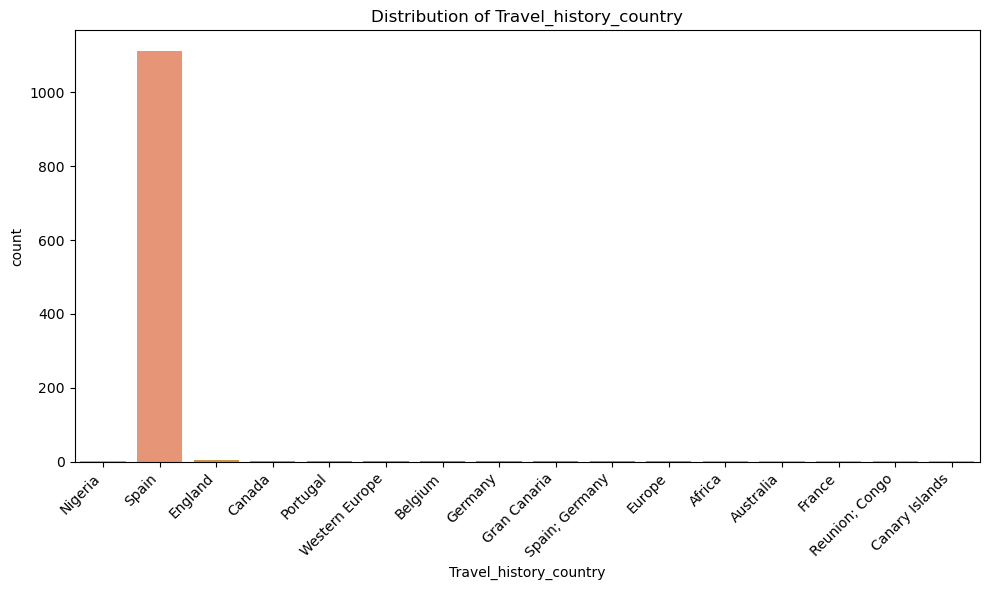

C:\Users\User\AppData\Local\Temp\ipykernel_25420\4141263075.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ensure the labels do not overlap


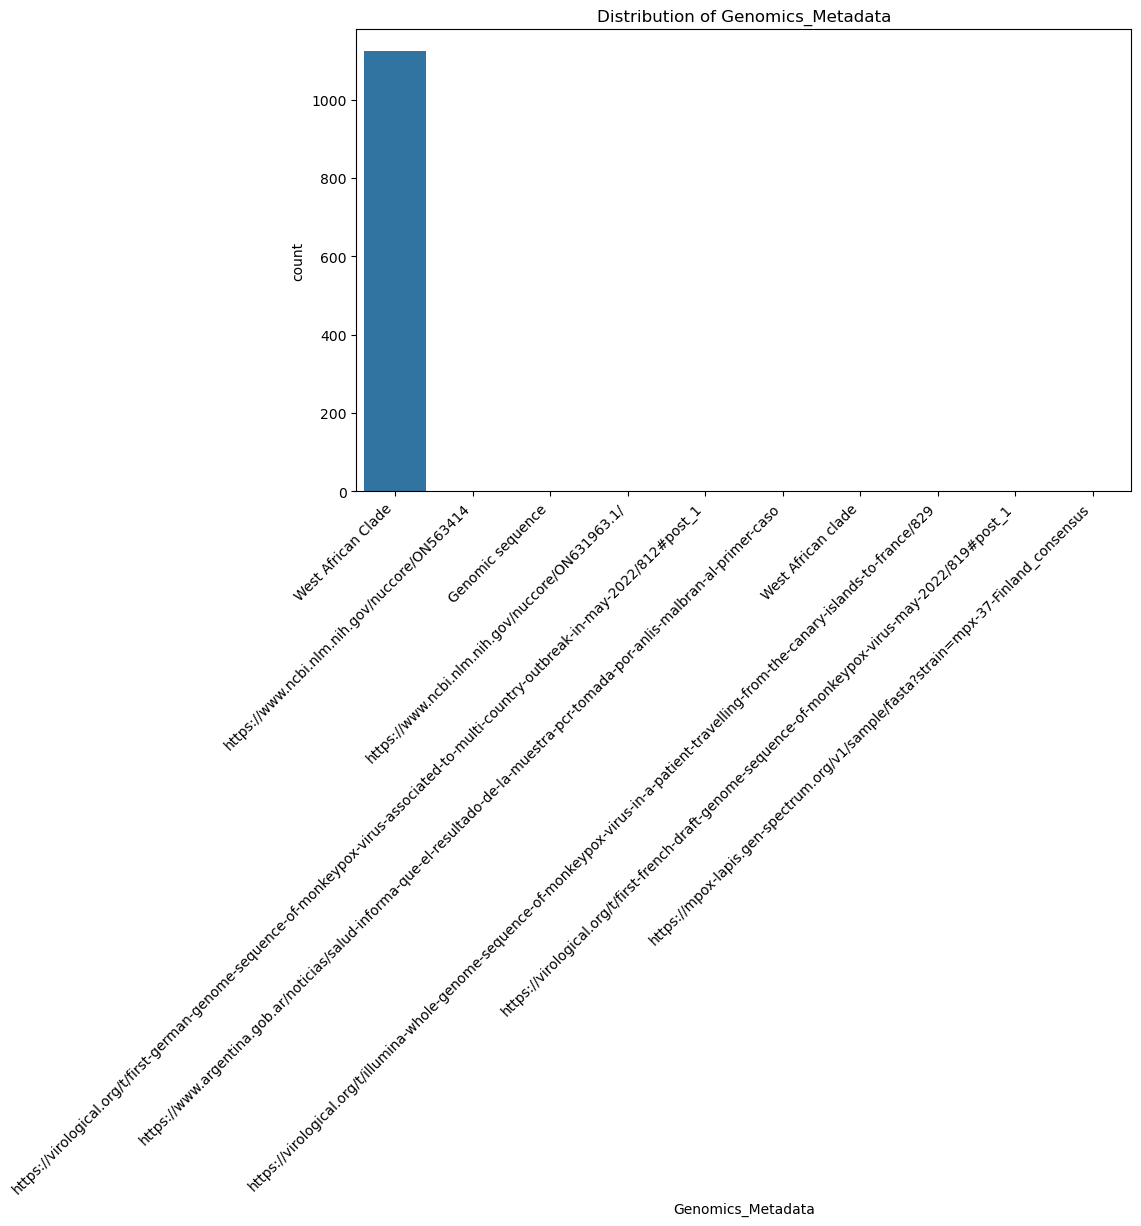

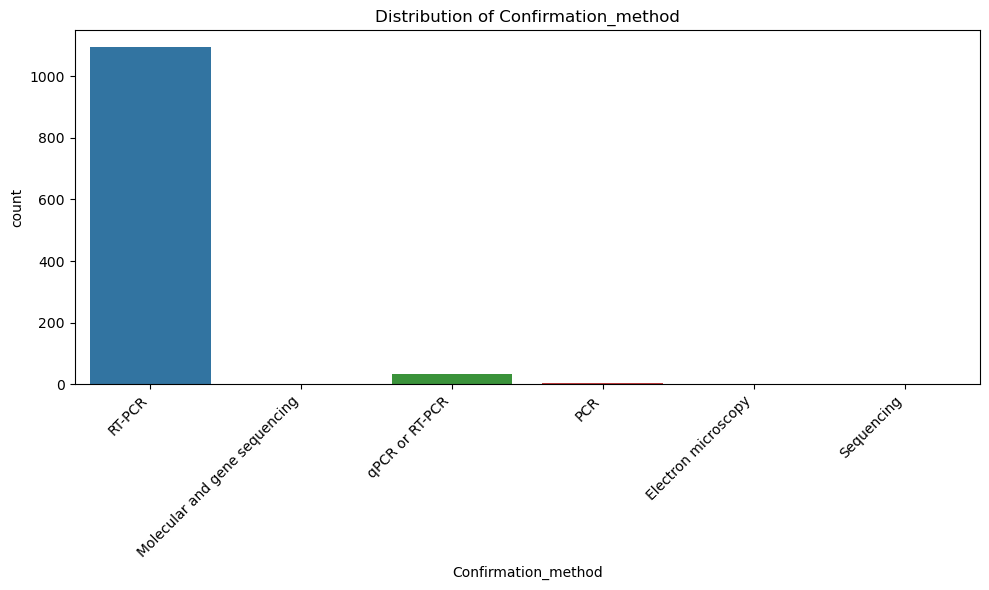

In [77]:
# Check distribution of categorical features
categorical_features = mk.select_dtypes(include=['object']).columns
for column in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=mk)
    plt.title(f'Distribution of {column}')
    
    plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels diagonally
    plt.tight_layout()  # Ensure the labels do not overlap
    plt.show()

In [88]:
mk.columns

Index(['Status', 'Location', 'City', 'Country', 'Age', 'Gender', 'Date_onset',
       'Date_confirmation', 'Symptoms', 'Hospitalised (Y/N/NA)',
       'Date_hospitalisation', 'Isolated (Y/N/NA)', 'Date_isolation',
       'Outcome', 'Contact_comment', 'Contact_location',
       'Travel_history (Y/N/NA)', 'Travel_history_entry',
       'Travel_history_start', 'Travel_history_location',
       'Travel_history_country', 'Genomics_Metadata', 'Confirmation_method'],
      dtype='object')

In [91]:
mk.head()

Status                             Location    City  Country    Age  \
0  confirmed  Guy's and St Thomas Hospital London  London  England  20-64   
1  confirmed  Guy's and St Thomas Hospital London  London  England  20-64   
2  confirmed                               London  London  England  20-64   
3  confirmed                               London  London  England  20-64   
4  confirmed                               London  London  England  20-64   

  Gender  Date_onset Date_confirmation        Symptoms Hospitalised (Y/N/NA)  \
0   male  29/04/2022        06/05/2022            rash                     Y   
1   male  05/05/2022        12/05/2022            rash                     Y   
2   male  30/04/2022        13/05/2022  vesicular rash                     N   
3   male  29/04/2022        15/05/2022  vesicular rash                     Y   
4   male  29/04/2022        15/05/2022  vesicular rash                     Y   

   ...    Outcome                  Contact_comment Contact_location  \
0  ...  Recovered              Under investigation        Household   
1  ...  Recovered  Index Case of household cluster        Household   
2  ...  Recovered              Under investigation        Household   
3  ...  Recovered              Under investigation        Household   
4  ...  Recovered              Under investigation        Household   

  Travel_history (Y/N/NA) Travel_history_entry Travel_history_start  \
0                       Y           04/05/2022           late April   
1                       N           16/05/2022           late April   
2                       N           16/05/2022           late April   
3                       N           16/05/2022           late April   
4                       N           16/05/2022           late April   

  Travel_history_location Travel_history_country   Genomics_Metadata  \
0  Lagos and Delta States                Nigeria  West African Clade   
1                  Europe                  Spain  West African Clade   
2                  Europe                  Spain  West African Clade   
3                  Europe                  Spain  West African Clade   
4                  Europe                  Spain  West African Clade   

  Confirmation_method  
0              RT-PCR  
1              RT-PCR  
2              RT-PCR  
3              RT-PCR  
4              RT-PCR  

[5 rows x 23 columns]